# Import packages

In [1]:
import numpy as np
import pandas as pd

from analysis.src.missing_value_analysis import SimpleMissingValueAnalysis
from analysis.src.basic_data_inspection import DataInspector, DataTypeInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis.src.univariate_analysis import UnivariateAnalyzer, NumericUnivariateAnalysis, CategoricalUnivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load data

In [2]:
df = pd.read_csv('../datasets/train.csv')

# Basic Data Inspection
## Data Types and Non-null counts

In [3]:
data_inspector = DataInspector(DataTypeInspectionStrategy())
data_inspector.execute_inspection(df)


Data types and Non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

## Insights
- The dataset contains **1460 entries** and **81 columns**
- **Data types:** There are 34 columns with `int64` data type, 3 columns with `float64` data type and 43 columns with `object` data type.
    - **Numerical Features:** These include features like `LotFrontage`, `LotArea`, `OverallQual`, `YearBuilt`, etc.
    - **Categorical Features:** Features like `MSZoning`, `Street`, `Alley`, `LotShape`, etc., are categorical
## Summary Statistics

In [4]:
data_inspector = data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary statistics (Numerical Features)
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   1

## Insights:
### Numerical Features
- `MSSubClass` (Type of dwelling involved in the sale): Numerical encoding of building types, ranging from 20 to 190, with a mean of **56.90** and a standard deviation of **42.30**
- `LotFrontage` (Linear feet of street connected to the property): Ranges from **21 to 313 feet**, with a mean of **70.05 feet**.
- `LotArea` (Lot size in square feet): Ranges from **1,300 to 215,245 sq ft**, with a mean of **10,516 sq ft** with a large maximum value indicating potential outliers.
- `OverallQual` (Overall material and finish quality): Ranges from **1 (very poor) to 10 (very excellent)**, with a mean of **6.10**, indicates most properties have above-average construction quality.
- `OverallCond` (Overall condition rating): Ranges from **1 to 9**, with a mean of **5.57** with most properties in average condition and limited variability
- `YearBuilt` (Year the house was built): Ranges from **1872 to 2010**, with a mean of **1971**, indicating a mix of older and more modern properties.
- `YearRemodAdd` (Year the house was remodeled): Ranges from **1950 to 2010**, with a mean of **1984** which shows many houses have undergone remodeling.
- `MasVnrArea` (Masonry veneer area in square feet): Ranges from **0 to 1,600 sq ft**, with a mean of **103.85 sq ft** and a median of **0** indicating that many homes lack masonry veneer
- `BsmtFinSF1` (Finished basement area type 1 in square feet): Ranges from **0 to 5,644 sq ft**, with a mean of **443.64 sq ft**, showing significant variation in basement finishes.
- `BsmtFinSF2` (Finished basement area type 2 in square feet): Ranges from **0 to 1,474 sq ft**, with a mean of **46.54 sq ft** and a median of **0**, indicating that most homes lack a second type of finished basement
- `BsmtUnfSF` (Unfinished basement area in square feet): Ranges from **0 to 2,336 sq ft**, with a mean of **567.24 sq ft**, indicating many homes have unfinished basement spaces
- `TotalBsmtSF` (Total basement area in square feet): Ranges from **0 to 6,110 sq ft**, with a mean of **1,057.42 sq ft** and some potential outliers with very large basement areas
- `1stFlrSF` (First-floor area in square feet): Ranges from **334 to 4,692 sq ft**, with a mean of **1,162.63 sq ft** indicating moderate first-floor sizes.
- `2ndFlrSF` (Second-floor area in square feet): Ranges from **0 to 2,065 sq ft**, with a mean of **346.92 sq ft** and a median of **0** showing that many homes lack a second floor
- `LowQualFinSF` (Low-quality finished area in square feet): Ranges from **0 to 572 sq ft**, with a mean of **5.84 sq ft** and a median of **0** indicating that most homes do not have low-quality finished spaces 
- `GrLivArea` (Above ground living area in square feet): Ranges from **334 to 5,642 sq ft**, with a mean of **1,515.46 sq ft**, indicating a variety of home sizes.
- `BsmtFullBath` (Number of full bathrooms in the basement): Ranges from **0 to 3**, with a mean of **0.42** and a median of **0**, showing that most homes do not have a full bathroom in the basement
- `BsmtHalfBath` (Number of half bathrooms in the basement): Ranges from **0 to 2**, with a mean of **0.06**, indicating that few homes have basement half bathrooms.
- `FullBath` (Number of full bathrooms above grade): Ranges from **0 to 3**, with a mean of **1.57**, meaning most homes have at least one full bathroom
- `HalfBath` (Number of half bathrooms above grade): Ranges from **0 to 2**, with a mean of **0.38**, indicating that most homes do not have half bathroom or they just have one half bathroom.
- `BedroomAbvGr` (Number of bedrooms above grade): Ranges from **0 to 8**, with a mean of **2.87**, showing that most homes have 2 or 3 bedrooms.
- `KitchenAbvGr` (Number of kitchens above grade): Ranges from **0 to 3**, with a mean of **1.04**, indicating that nearly all homes have one kitchen.
- `TotRmsAbvGrd` (Total rooms above grade): Ranges from **2 to 14**, with a mean of **6.52**, showing that most homes have a moderate number of rooms.
- `Fireplaces` (Number of fireplaces): Ranges from **0 to 3**, with a mean of **0.61**, indicating that  many homes lack fireplaces.
- `GarageYrBlt` (Year the garage was built): Ranges from **1900 to 2010**, with a mean of **1978**, reflecting the timeline of garage construction.
- `GarageCars` (Garage size in car capacity): Ranges from **0 to 4**, with a mean of **1.77** indicating that most homes have garages accommodating **1 to 2 cars**.
- `GarageArea` (Garage area in square feet): Ranges from **0 to 1,418 sq ft**, with a mean of **472.98 sq ft** and a standard deviation of **213.80 sq ft**, showing significant variation in garage sizes.
- `WoodDeckSF` (Wooden deck area in square feet): Ranges from **0 to 857 sq ft**, with a mean of **94.24 sq ft** and a median of **0 sq ft**, indicating that many homes lack wooden decks.
- `OpenPorchSF` (Open porch area in square feet): Ranges from **0 to 547 sq ft**, with a mean of **46.66 sq ft**, meaning many homes lack open porches.
- `EnclosedPorch` (Enclosed porch area in square feet): Ranges from **0 to 552 sq ft**, with a mean of **21.95 sq ft** and a median of **0 sq ft**, indicating that most homes do not have an enclosed porch.
- `3SsnPorch` (Three-season porch area in square feet): Ranges from **0 to 508 sq ft**, with a mean of **3.49 sq ft** and a median of **0 sq ft**, showing that very few homes have this feature.
- `ScreenPorch` (Screened porch area in square feet): Ranges from **0 to 480 sq ft**, with a mean of **15.06 sq ft** and a median of **0 sq ft**, indicating that most homes lack this feature.
- `PoolArea` (Pool area in square feet): Ranges from **0 to 738 sq ft**, with a mean of **2.76 sq ft** and median of **0 sq ft**, showing that pools are uncommon in this dataset.
- `MiscVal` (Value of miscellaneous features in dollars): Ranges from **\$0 to \$15,500**, with a mean of **\$43.49** and a median of **$0**, indicating that most homes do not have significant miscellaneous values.
- `MoSold` (Month of sale): Ranges from **1 to 12**, with a mean of **6.32**, indicating that sales are evenly distributed across months.
- `YrSold` (Year of sale): Ranges from **2006 to 2010**, with a mean of **2007.82**, showing that sales are balanced across the years.
- `SalePrice` (Target variable): Ranges from **\$34,900 to \$755,000**, with a mean of **\$180,921.20** and a standard deviation of **\$79,442.50** suggests significant price variability.

### Categorical Features
- `MSZoning` (Zoning classification): Contains **5 unique** categories, with **RL (Residential Low Density)** being the most common, suggesting that a majority of homes are in low-density residential areas.
- `Street` (Type of road access): Has **2 unique values**; **Pave (paved)** and **Grvl (gravel)** with pave dominating the dataset with 1454 occurrences, indicating most properties have paved road access.
- `Alley` (Type of alley access): Contains **2 unique** categories, **Grvl (gravel)** and **Pave (paved)**, but has a high number of missing values (91 non-missing entries), suggesting alley access is not common in this dataset.
- `LotShape` (General shape of property): Has **4 unique** categories, with **Reg (regular)** being the most common
- `LandContour` (Flatness of the property): Contains **4 unique** categories, with **Lvl (near flat/level)** being the most frequent
- `Utilities` (Type of utilities available): Contains **2 unique** values, with **AllPub (all public utilities)** dominating, suggesting that utilities are widely available for nearly all properties.
- `LotConfig` (Lot configuration): Contains **5 unique** categories, with **Inside (inside lot)** being the most common, showing that most properties are inside lots rather than corner or cul-de-sac lots.
- `LandSlope` (Slope of the property): Contains **3 unique** values, with **Gtl (gentle slope)** being the most frequent.
- `Neighborhood`: Contains **25 unique** categories, with `NAmes` being the most common neighborhood, suggesting that some neighborhoods dominate the dataset, which might influence property prices.
- `Condition1` (Proximity to various conditions): Contains **9 unique** categories, with **Norm (normal condition)** being the most frequent, indicating most properties are not affected by proximity to major roads or railroads.
- `Condition2` (Secondary proximity to various conditions): Contains **8 unique** values, with **Norm** being the most frequent, reinforcing that most properties are unaffected by secondary road/railroad proximity.
- `BldgType` (Type of building): Contains **5 unique** categories, with **1Fam (single-family detached)** being the most common, which highlights the dominance of single-family homes in this dataset.
- `HouseStyle` (Style of dwelling): Contains **8 unique** categories, with **1Story (one-story homes)** being the most frequent, indicating a significant preference for single-story homes.
- `RoofStyle`: Contains **6 unique** styles, with **Gable** being the most frequent, suggesting that **gable** roofs are the most common in the dataset.
- `RoofMatl` (Roof material): Contains **8 unique** materials, with **CompShg (composite shingles)** being the most common, indicating composite shingles are the standard roofing material.
- `Exterior1st` (Primary exterior material): Contains **15 unique** materials, with **VinylSd (vinyl siding)** being the most frequent, suggesting **vinyl siding** is a popular exterior finish.
- `Exterior2nd` (Secondary exterior material): Contains **16 unique** materials, with **VinylSd** being the most frequent, similar to `Exterior1st`, **vinyl siding** dominates.
- `MasVnrType` (Masonry veneer type): Contains **3 unique** categories, with **BrkFace (brick face)** being the most frequent
- `ExterQual` (Exterior quality): Contains **4 unique** categories, with **TA (Typical/Average)** being the most frequent, indicating that most homes have standard exterior quality.
- `ExterCond` (Exterior condition): Contains **5 unique** categories, with **TA** being the most frequent, most properties have an average exterior condition.
- `Foundation`: Contains **6 unique** types, with **PConc (poured concrete)** being the most frequent, indicating that **poured concrete** is the most common foundation type.
- `BsmtQual` (Basement height): Contains **4 unique** categories, with **TA** being the most frequent, suggesting that most basements are of typical quality.
- `BsmtCond` (Basement condition): Contains **4 unique** categories, with **TA** being the most frequent, meaning most basements are in average condition.
- `BsmtExposure` (Walkout basement exposure): Contains **4 unique** categories, with **No (no exposure)** being the most frequent, indicating that most homes lack basement exposure.
- `BsmtFinType1` (Basement finished area type 1): Contains **6 unique** categories, with **Unf (unfinished)** being the most frequent, showing that many basements remain unfinished.
- `Heating`: Contains **6 unique** categories, with **GasA (gas forced air)** being the most frequent
- `HeatingQC` (Heating quality and condition): Contains **5 unique** categories, with **Ex (excellent)** being the most frequent, indicating that most heating systems are of excellent quality.
- `CentralAir` (Central air conditioning): Contains **2 unique** values (**Y for Yes, N for No**), with Y being the most frequent, suggesting that most homes have central air conditioning.
- `Electrical`: Contains **5 unique** categories, with **SBrkr (standard circuit breaker and romex)** being the most frequent
- `KitchenQual` (Kitchen quality): Contains **4 unique** categories, with **TA** being the most frequent indicating that most kitchens are of average quality.
- `Functional` (Home functionality rating): Contains **7 unique** categories, with **Typ (typical)** being the most frequent, suggesting that most homes have typical functionality.
- `FireplaceQu` (Fireplace quality): Contains **5 unique** categories, with **Gd (good)** being the most frequent, indicating that many homes lack fireplaces (missing values exist).
- `GarageType`: Contains **6 unique** categories, with **Attchd (attached garage)** being the most frequent, suggesting that most homes have attached garages.
- `GarageFinish` (Garage interior finish): Contains **3 unique** categories, with **Unf (unfinished)** being the most frequent, suggesting that most garages are unfinished.
- `GarageQual` (Garage quality): Contains **3 unique** categories, with **TA** being the most frequent, indicating that most garages are of average quality.
- `GarageCond` (Garage condition): Contains **5 unique** categories, with **TA** being the most frequent, suggesting that most garages are in average condition.
- `PavedDrive` (Paved driveway): Contains **3 unique** categories, with **Y (paved)** being the most frequent, indicating that most homes have paved driveways.
- `PoolQC` (Pool quality): Contains **3 unique** categories, with **Gd (good)** being the most frequent.
- `Fence`: Contains **4 unique** categories, with **MnPrv (minimum privacy)** being the most frequent
- `MiscFeature` (Miscellaneous feature): Contains **4 unique** categories, with **Shed** being the most frequent
- `SaleType`: Contains **9 unique** categories, with **WD (warranty deed)** being the most frequent, indicating that most sales involve a warranty deed.
- `SaleCondition`: Contains **6 unique** categories, with **Normal** being the most frequent, suggesting that most sales occur under normal conditions.


# Missing Value Analysis


Missing values Count by Column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


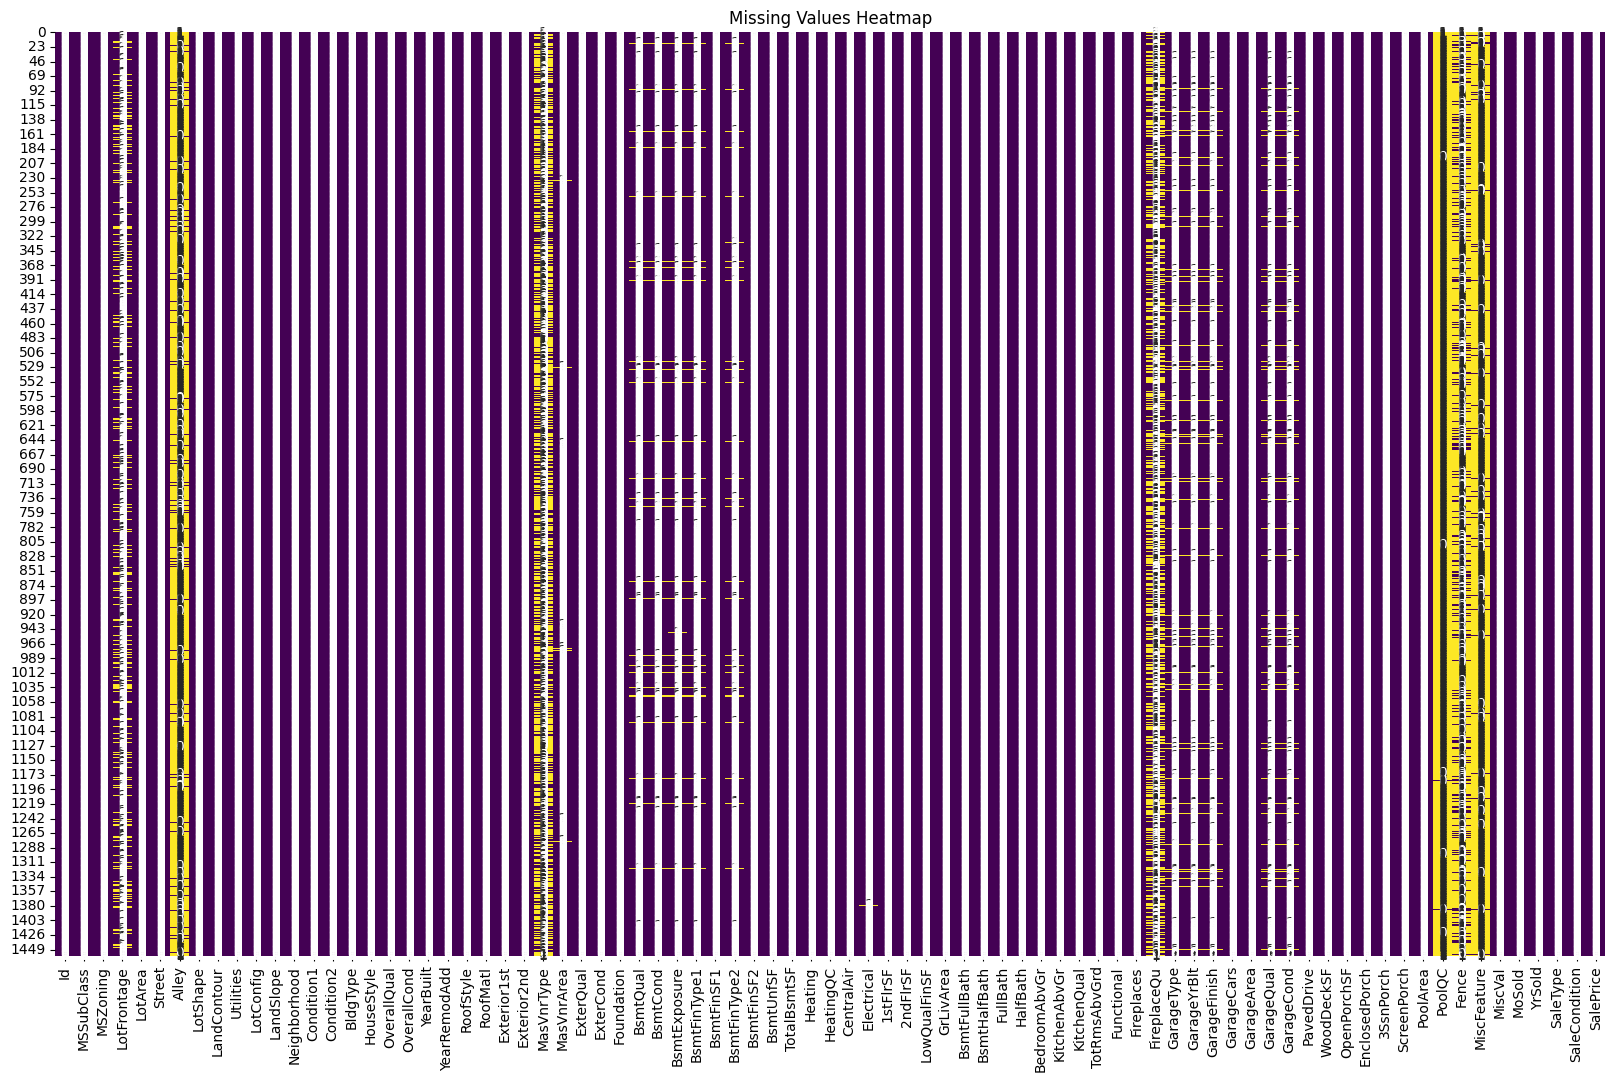

In [5]:
missing_value_analyzer = SimpleMissingValueAnalysis()
missing_value_analyzer.analyze(df)

## Insights:
- Features such as `Alley`, `PoolQC`, `Fence`, and `MiscFeature` have a high proportion of missing values, requiring thoughtful handling. It is necessary to decide whether to exclude these features entirely or to impute the missing values based on the context.
- Features like `MasVnrType` and `FireplaceQu` have a moderate number of missing values, which may call for a balanced imputation strategy to retain their predictive utility.
- Features such as `LotFrontage`, `BsmtQual`, `BsmtCond`, and similar columns have relatively few missing values, which can be addressed with straightforward imputation techniques.
- The data dictionary indicates that, for many features, missing values signify the absence of that attribute (e.g., no alley access or no pool). This contextual information should guide the treatment of missing data to ensure it aligns with the intended meaning.

# Univariate Analysis
## Numerical Features

In [6]:
univariate_analyzer = UnivariateAnalyzer(NumericUnivariateAnalysis())

### MSSubClass

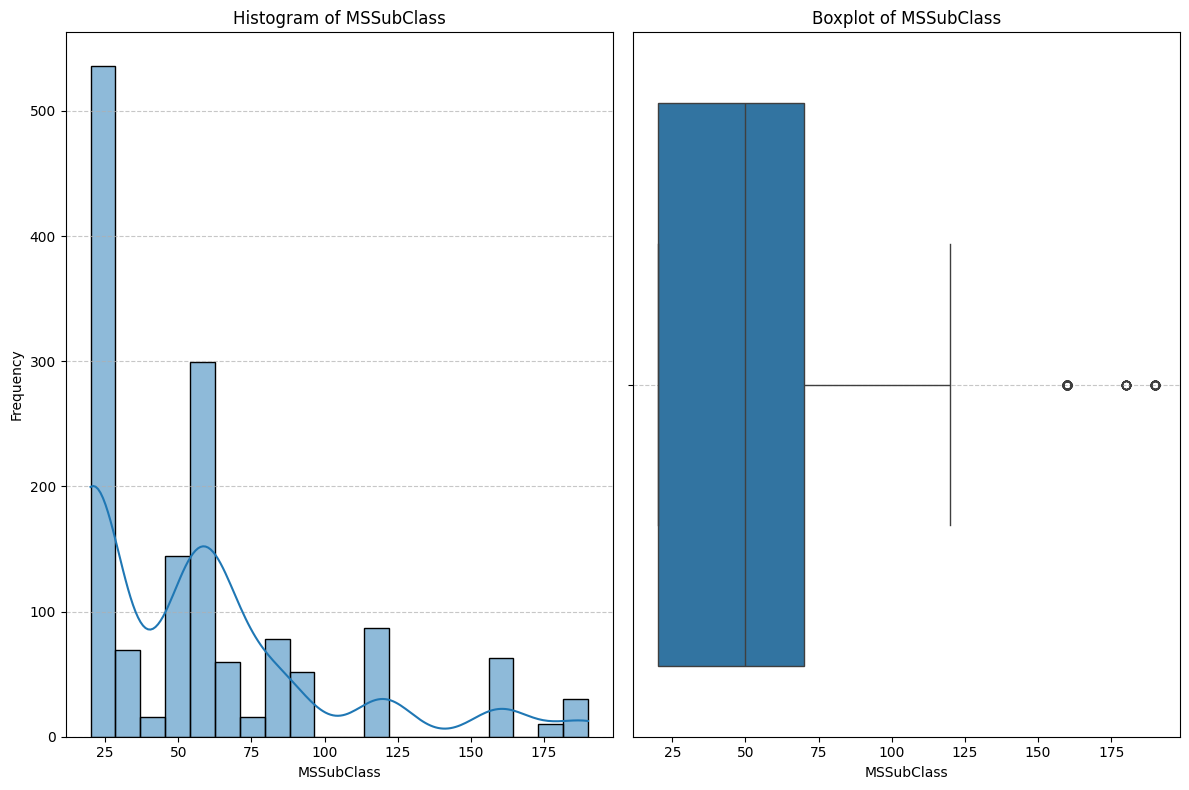

In [7]:
univariate_analyzer.analyze(df, 'MSSubClass')

#### Insight:
- The histogram shows that the majority of values in the MSSubClass feature are concentrated around the lower bins, particularly at values close to 20 and 60. This indicates that most properties fall under these subclass categories.
- The distribution is highly right-skewed, with fewer occurrences at higher values of MSSubClass.
- The boxplot confirms this skewness, with a significant number of outliers on the upper end (greater than approximately 120).
#### Implication:
- The skewness suggests that specific subclasses dominate the dataset, potentially representing popular property types or configurations.
- The presence of outliers in higher subclass values warrants further exploration. These might represent rare or specialized property types, which could influence model performance if not handled carefully.
- During modelling I will consider encoding MSSubClass as a categorical variable as it represents nominal categories

### LotFrontage

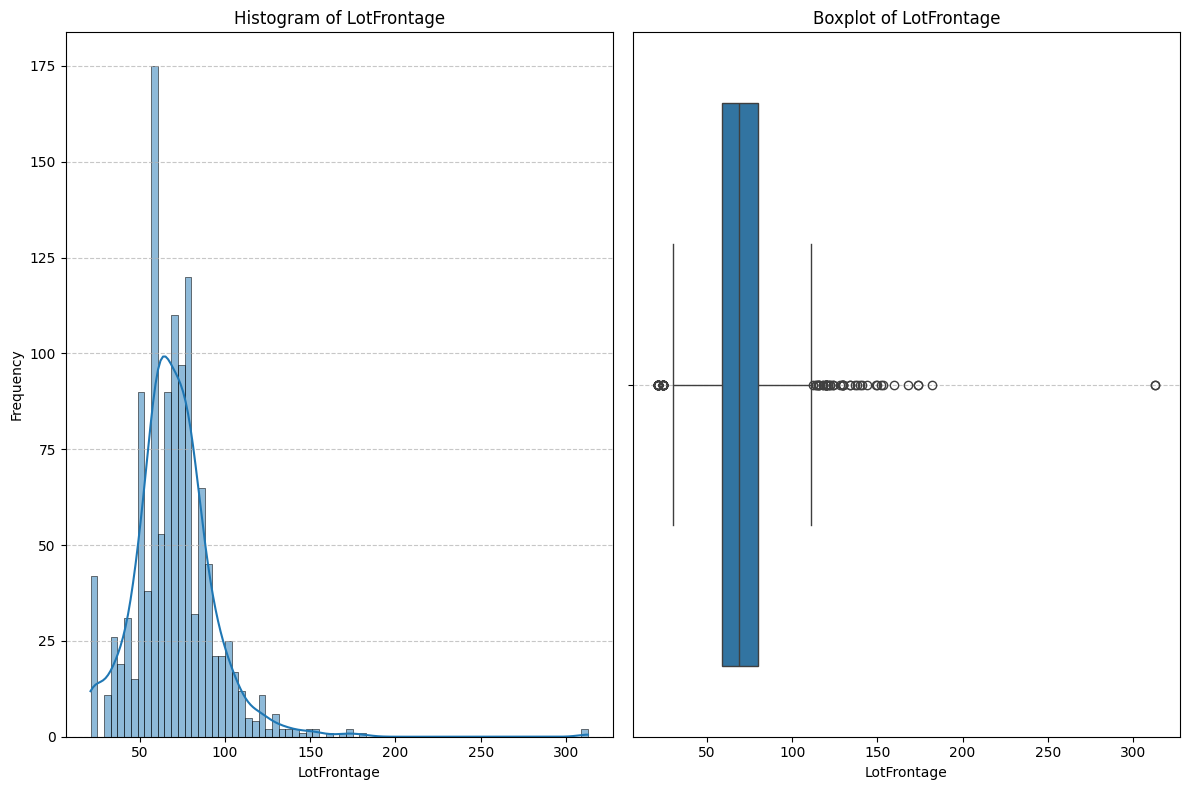

In [10]:
univariate_analyzer.analyze(df, 'LotFrontage')

#### Insight:
- The histogram shows a positively skewed distribution, with most values clustered between 50 and 100. There is a noticeable peak around 60, suggesting this is the most common lot frontage in the dataset.
- The boxplot highlights the presence of several outliers on the higher end (greater than 150). These represent properties with unusually large lot frontages. It also shows a few outliers on the lower end (less than ~25), which represents properties with unusually small lot frontages
#### Implication:
- The skewness and outliers suggest that the `LotFrontage` variable might benefit from a log or square root transformation to reduce skewness if used as a predictor in modeling.
- The outliers might correspond to properties with unique characteristics, such as large estates, which could have a disproportionate influence on certain models. These cases may need to be addressed through capping, transformation, or separate analysis.
- Missing or zero values in LotFrontage should be explored further to understand their context, as they could indicate incomplete or non-standard lot data.

### LotArea

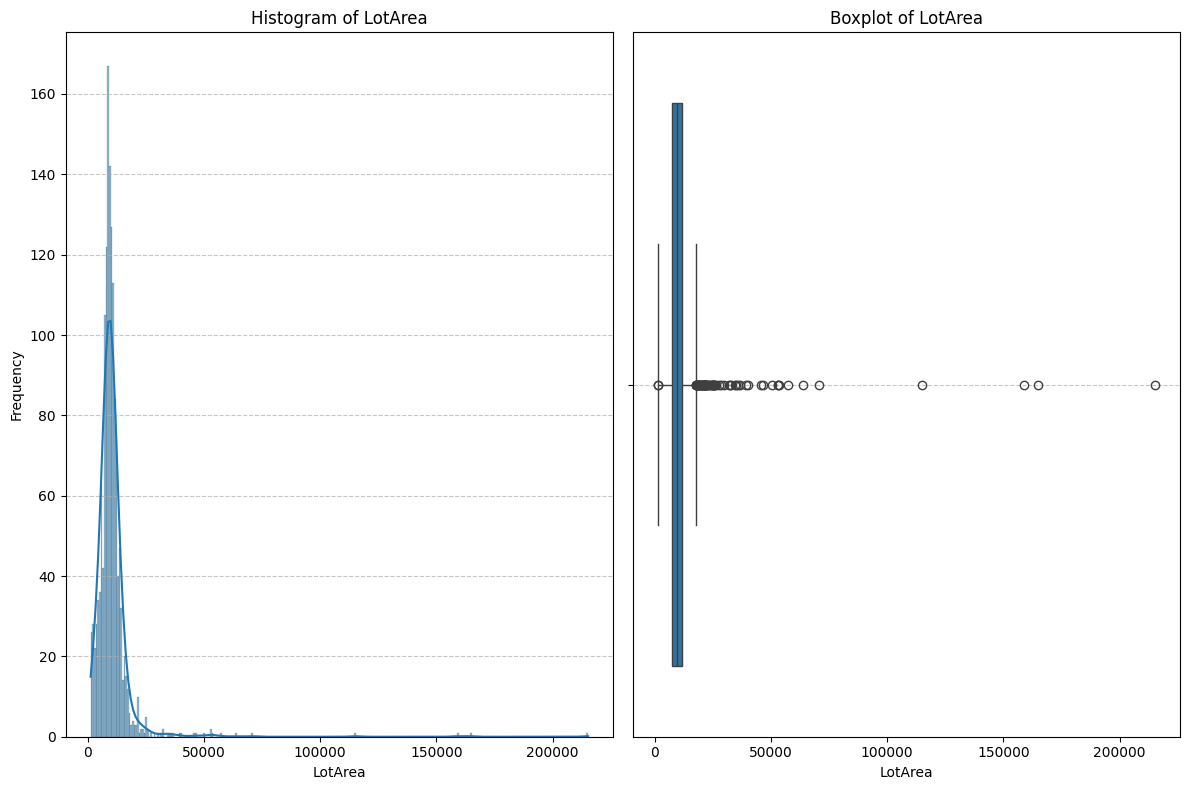

In [11]:
univariate_analyzer.analyze(df, 'LotArea')

#### Insight:
- The histogram reveals an extreme right-skewed distribution, with most of the values clustered in the lower range, particularly below 20,000. There is a long tail extending toward much larger lot areas.
- The boxplot confirms this pattern, showing a tightly packed interquartile range (IQR) with numerous outliers far beyond the upper whisker. These outliers represent properties with significantly larger lot areas.
#### Implication:
- The heavily skewed distribution and presence of extreme outliers suggest that the `LotArea` variable may require a log or other nonlinear transformation to stabilize variance and reduce skewness for predictive modeling.
- Outliers might correspond to atypical properties (e.g., estates, farms, or commercial land), which could skew model results if not treated carefully. Investigating these outliers individually could provide insights into whether they are valid or should be handled (e.g., by capping or excluding).
### OverallQual

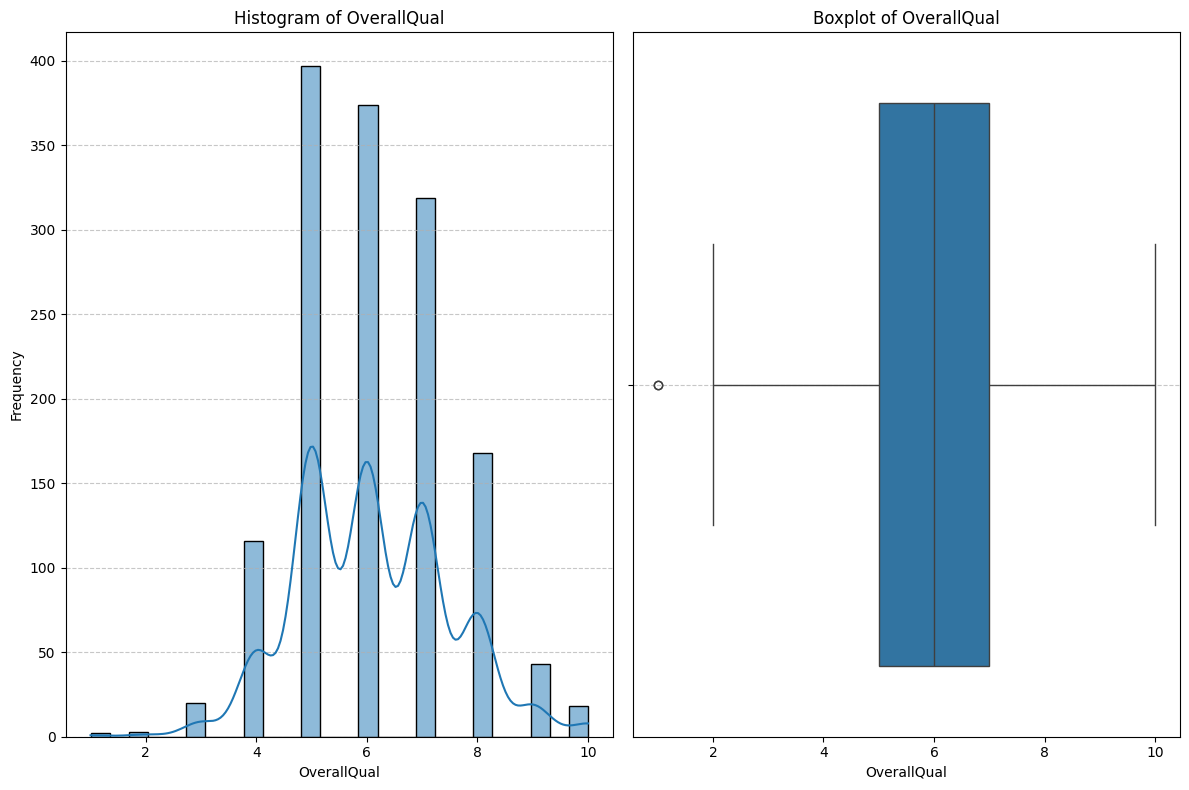

In [12]:
univariate_analyzer.analyze(df, 'OverallQual')

#### Insight:
- The histogram of `OverallQual` shows a multimodal distribution, with distinct peaks at values 5, 6, and 7. These peaks suggest that these quality ratings are the most common in the dataset.
- The boxplot shows that the `OverallQual` values are tightly clustered, with no extreme outliers. The interquartile range spans roughly from 5 to 7, indicating that most homes fall within average to slightly above-average quality levels.
#### Implication:
- The multimodal nature of the distribution suggests that `OverallQual` captures categorical or ordinal information related to property quality. As such, it should be treated as an ordinal variable in modeling, respecting the rank order of the quality ratings.
- Given its centrality and lack of significant outliers, `OverallQual` appears to be a robust predictor that likely differentiates properties well. It should be closely analyzed for its relationship with other variables, especially SalePrice, to determine its predictive power.
### OverallCond

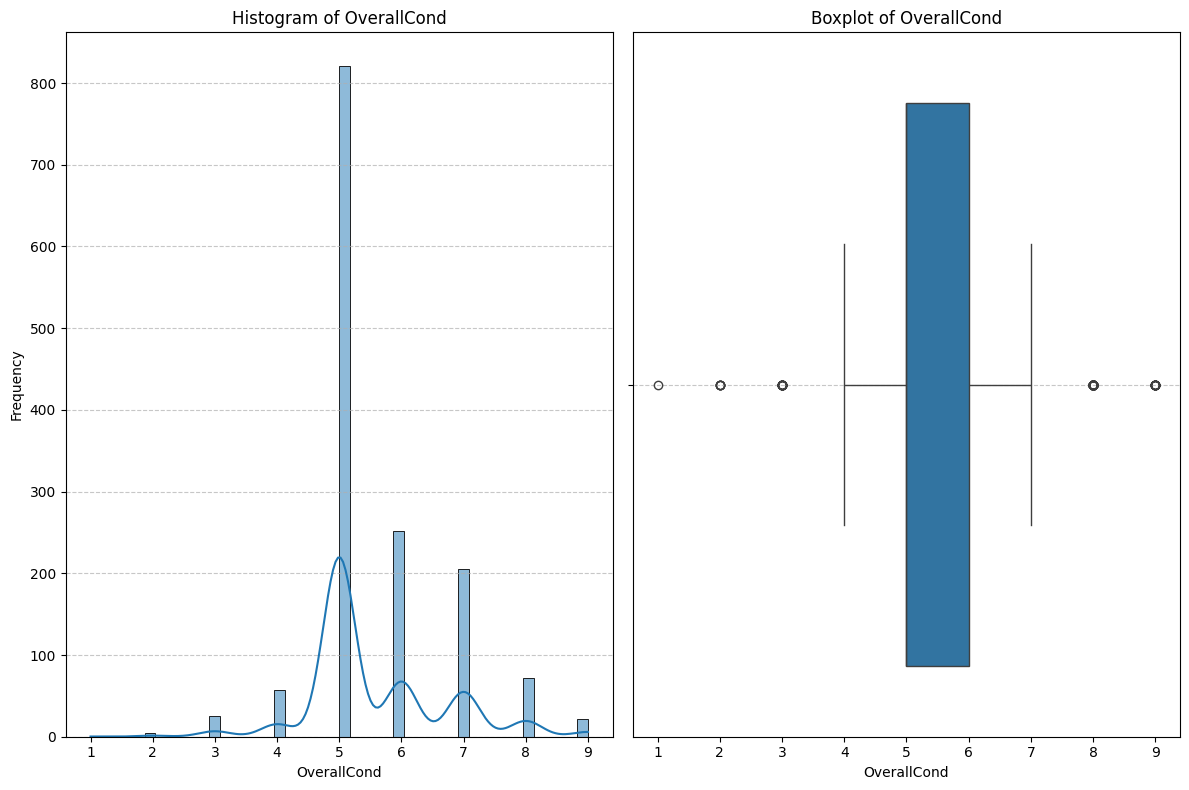

In [13]:
univariate_analyzer.analyze(df, 'OverallCond')

#### Insight:
- The histogram of OverallCond shows a strongly unimodal distribution, with the majority of observations concentrated at a value of 5. This indicates that most properties in the dataset have an average overall condition.
- The boxplot reveals a symmetric distribution with minimal variability and a few outliers at the lower end (conditions rated as 1–3) and upper end (conditions 8 and 9). The IQR spans between approximately 4 and 6, highlighting that most properties are rated as average or slightly above/below average.
#### Implication:
- The concentration of values at 5 suggests that `OverallCond` might not provide much variance to differentiate between properties unless its relationship with the target variable (SalePrice) is significant. This should be examined further to evaluate its predictive importance.
- The lower-end outliers (ratings 1–3) represent properties with notably poor conditions. These could have unique relationships with the target variable and may influence model performance disproportionately if not treated appropriately.
- As `OverallCond` is an ordinal variable, maintaining its order in preprocessing (e.g., during encoding) is crucial. Additional grouping of rare values (like 1–3 or 8–9) may also be considered to simplify the feature for modeling.
### YearBuilt

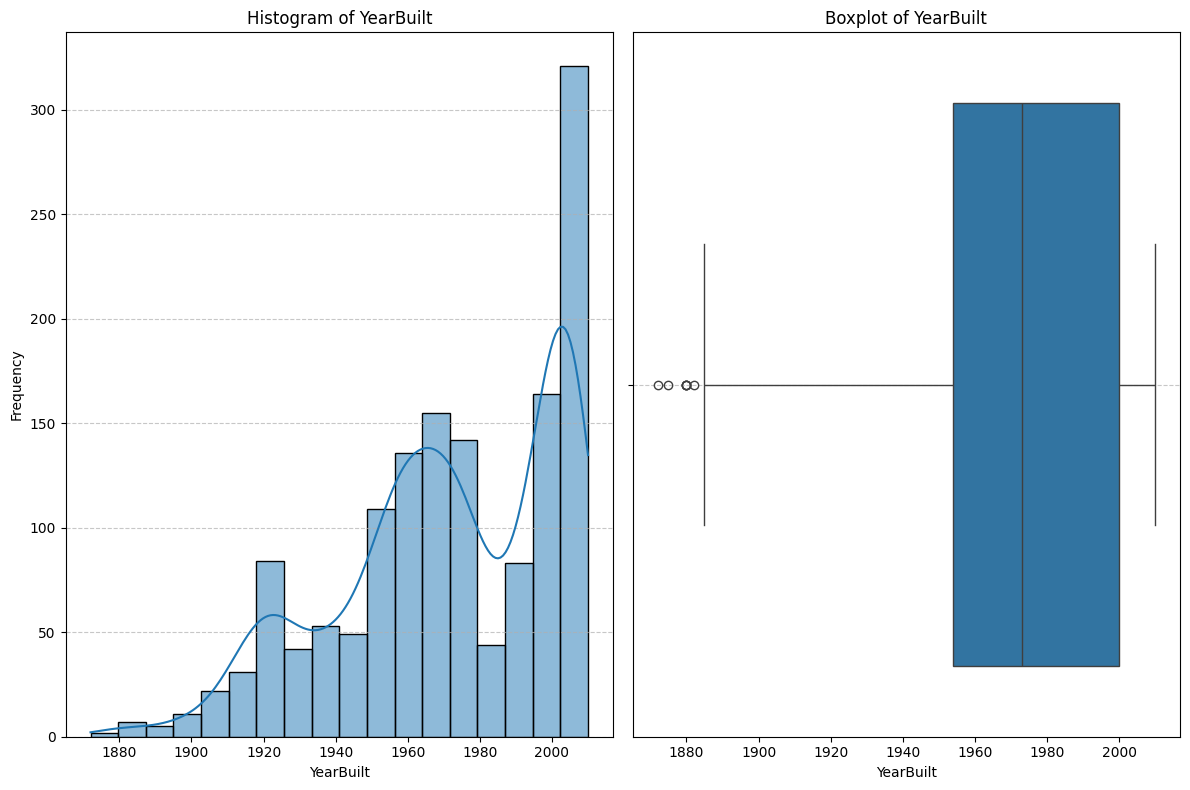

In [14]:
univariate_analyzer.analyze(df, 'YearBuilt')

#### Insight:
- The histogram of YearBuilt shows a bimodal pattern, with significant construction activity during two distinct periods: around 1950–1980 and post-2000. The spike in the most recent bin indicates that many properties were built after 2000.
- The boxplot reveals a generally right-skewed distribution, with a long lower tail representing older properties (built before 1900). However, no extreme outliers are visible, and most data points are within a reasonable range.
#### Implication:
- The bimodal nature of YearBuilt suggests that the dataset includes a mix of older and newer properties, potentially reflecting differences in architectural styles, building codes, or materials. This could influence other features.
- The lower tail of older properties might need further exploration, as they may behave differently in terms of the target variable (SalePrice). For instance, older homes could either have higher value due to historical significance or lower value due to depreciation.
- If YearBuilt is used as a numerical feature, it might be beneficial to engineer additional features (e.g., property age at the time of sale) to capture temporal trends more effectively.

### YearRemodAdd

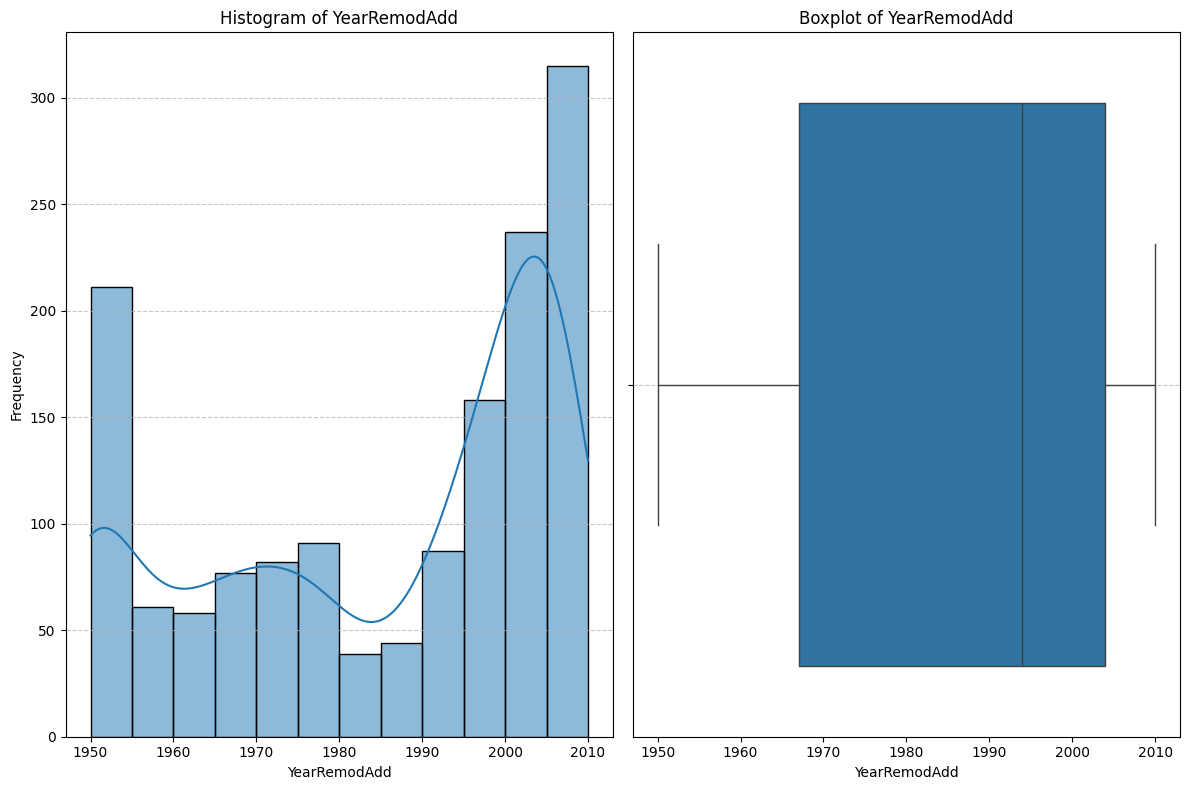

In [15]:
univariate_analyzer.analyze(df, 'YearRemodAdd')

#### Insight:
- The histogram of `YearRemodAdd` shows a relatively uniform distribution for years before 2000, followed by a sharp increase in frequency post-2000. This indicates that a significant number of properties underwent remodeling or additions in the recent decades.
- The boxplot suggests a fairly symmetric distribution without extreme outliers. The interquartile range spans from around 1970 to 2005, capturing most of the remodeling dates in the dataset.
#### Implication:
- The peak in recent years highlights a trend of increasing remodeling activity. This could reflect modernization trends or increased homeowner investment in property updates.
- The variable may play a critical role in predictive modeling, as recently remodeled properties might have a positive correlation with `SalePrice` due to updated features or improved aesthetics.
- To enhance interpretability, I will consider creating a derived feature such as "years since last remodeling" to capture the recency of the remodeling, which might better correlate with the target variable.

### MasVnrArea

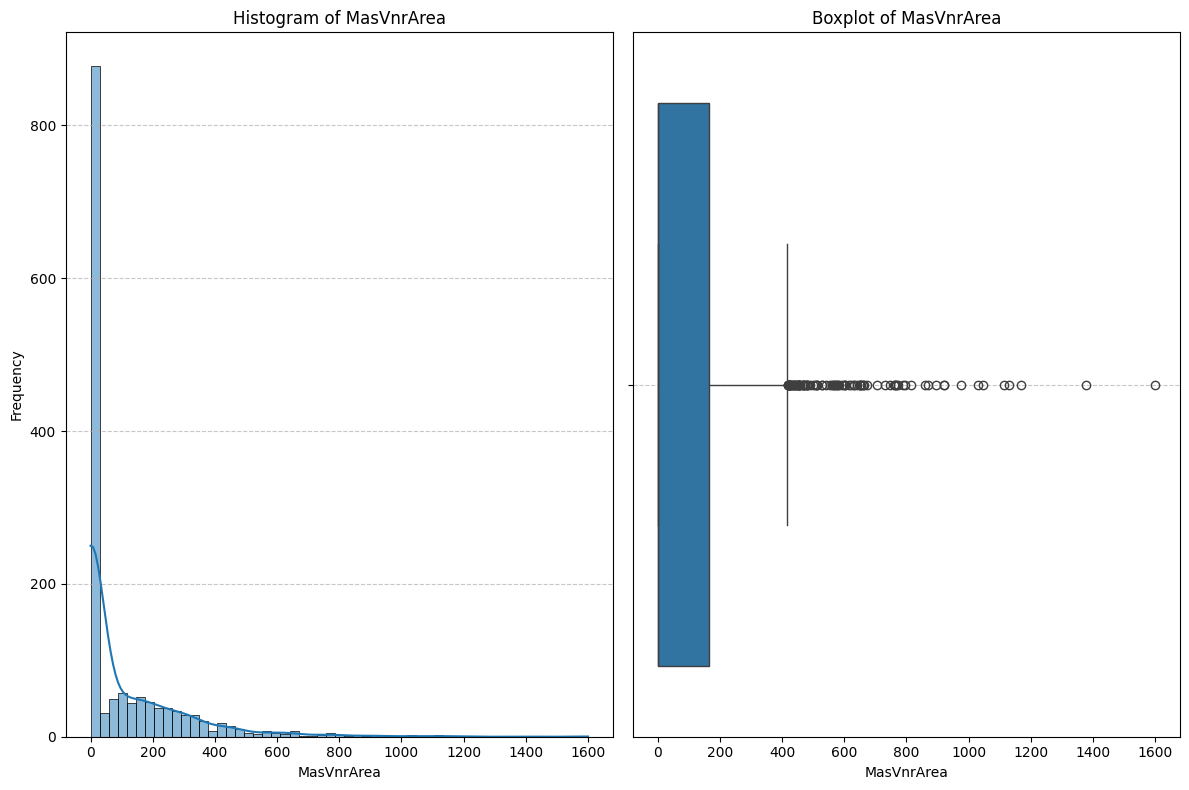

In [16]:
univariate_analyzer.analyze(df, 'MasVnrArea')

#### Insight:
- The histogram of MasVnrArea (Masonry Veneer Area) reveals a highly right-skewed distribution, with a significant number of properties having a MasVnrArea of 0. This indicates that many properties do not have a masonry veneer.
- The boxplot confirms the skewness and highlights several high-value outliers above 400, indicating properties with exceptionally large masonry veneer areas. The IQR is small, reflecting the concentration of values near 0.
#### Implication:
- The high frequency of zero values suggests that MasVnrArea might be treated as a binary variable (e.g., presence or absence of masonry veneer) for certain analyses. Alternatively, a log transformation (after adding a small constant) could help normalize the distribution for modeling purposes.
- The presence of large outliers indicates potential specialty or high-end properties. These might skew predictions in models like linear regression unless appropriately addressed (e.g., capping or separate handling).
### BsmtFinSF1

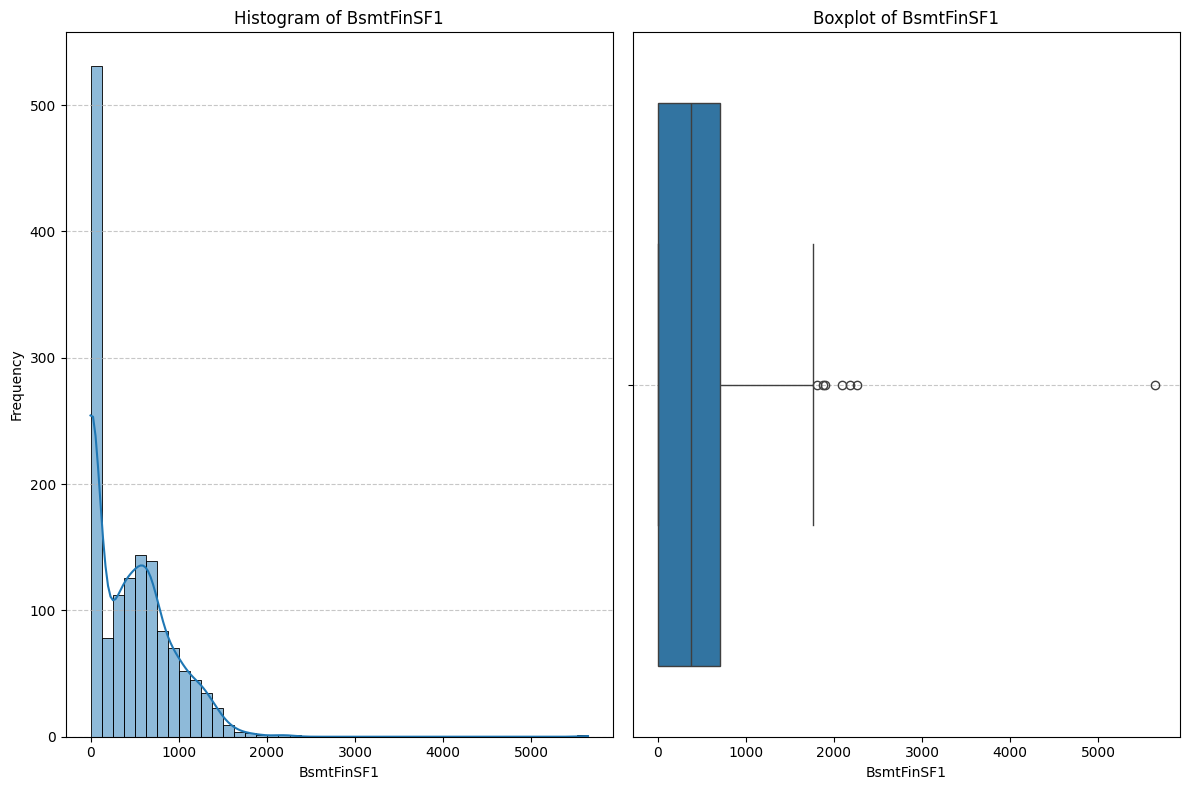

In [17]:
univariate_analyzer.analyze(df, 'BsmtFinSF1')

#### Insight:
- The histogram of BsmtFinSF1 (finished square footage of basement type 1) shows a highly right-skewed distribution, with the majority of properties having small to moderate finished basement areas, mostly clustered below 1,000 square feet. A significant number of properties have zero finished basement area, suggesting they lack finished basements.
- The boxplot confirms the skewness, with a compact interquartile range (IQR) and several high-value outliers above 2,000 square feet. These outliers represent properties with exceptionally large finished basement areas.
#### Implication:
- The prevalence of zeros suggests that `BsmtFinSF1` might benefit from being split into two components: a binary indicator for whether the property has a finished basement (BsmtFinSF1 > 0) and the actual size for those that do.
- The skewness and outliers could distort model predictions if this variable is used directly. Applying a log transformation might help stabilize variance and reduce skewness.
### BsmtFinSF2

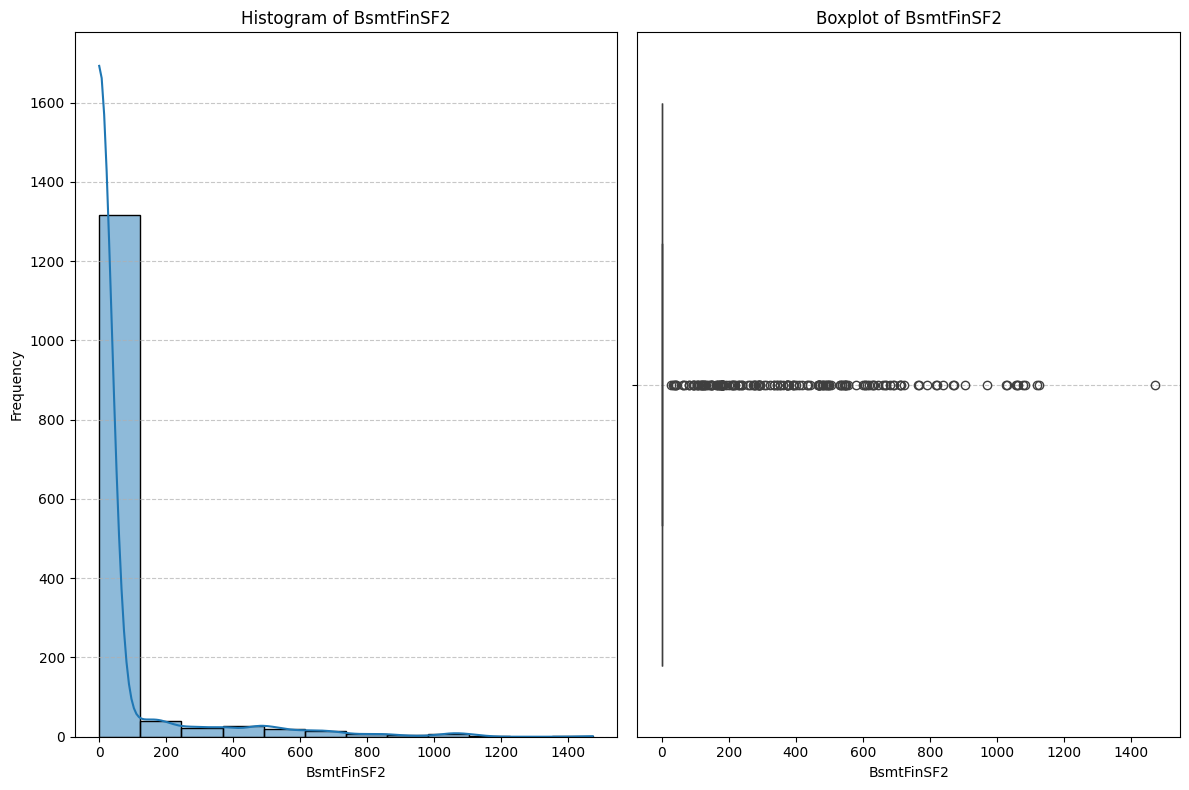

In [18]:
univariate_analyzer.analyze(df, 'BsmtFinSF2')

#### Insight:
- The histogram of `BsmtFinSF2` (finished square footage of basement type 2) reveals an extremely right-skewed distribution, with the vast majority of properties having a value of 0. This indicates that most properties do not have a type 2 finished basement area.
- The boxplot shows a highly compressed range with several outliers beyond 500 square feet. These represent rare properties with large secondary finished basement areas.
#### Implication:
- Given that most values are 0, I will consider converting `BsmtFinSF2` into a binary feature (e.g., whether a secondary finished basement exists) and a separate numerical feature for the non-zero values. This could simplify analysis and modeling.
- The skewness and outliers suggest that transformations, such as a log scale, may help stabilize variance if this feature is used directly in predictive modeling.
- The rarity of non-zero values may reduce the importance of this feature in general models unless secondary basements strongly correlate with the target variable (`SalePrice`)
### BsmtUnfSF

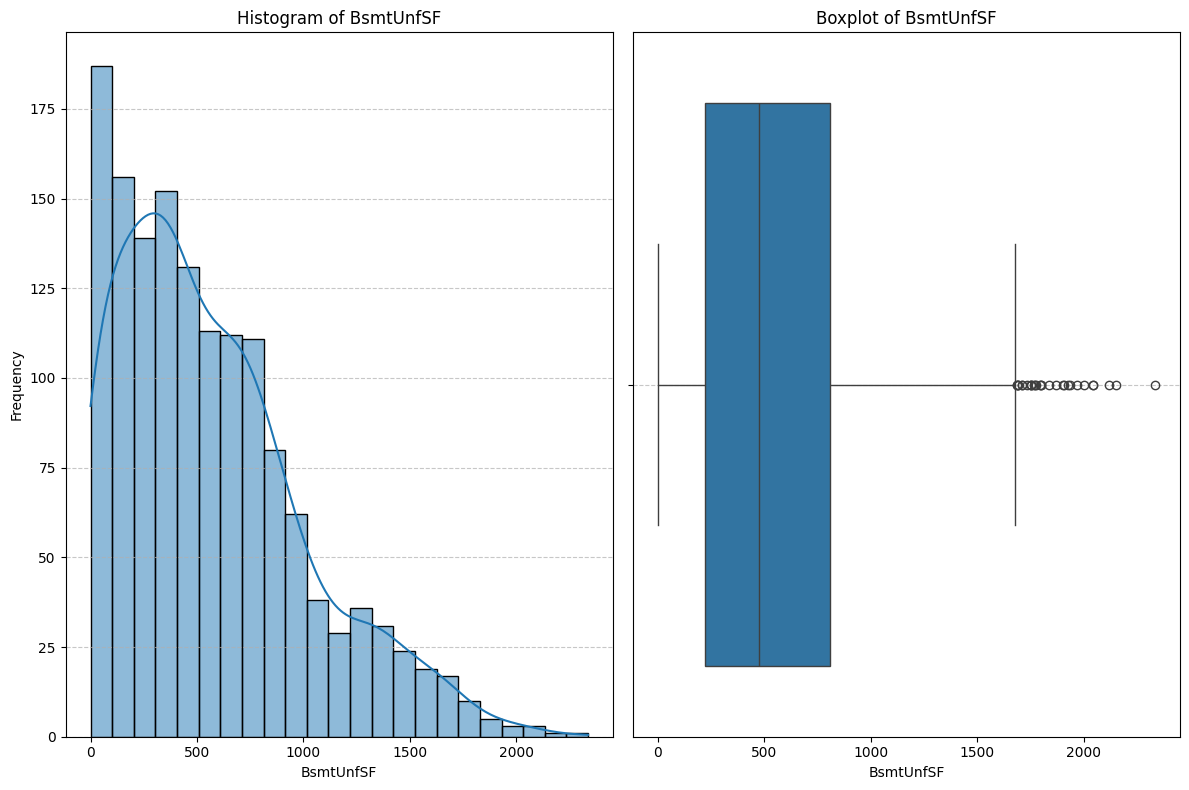

In [19]:
univariate_analyzer.analyze(df, 'BsmtUnfSF')

#### Insight:
- The histogram of `BsmtUnfSF` (unfinished square footage of the basement) exhibits a slightly right-skewed distribution. Most properties have unfinished basement areas clustered below 1,000 square feet, with a gradual tapering off toward higher values.
- The boxplot shows a relatively broad interquartile range, with some outliers beyond 1,700 square feet. These outliers correspond to properties with unusually large unfinished basements.
#### Implication:
- The presence of a broad range of values indicates that `BsmtUnfSF` could be an important feature, potentially capturing variation in overall basement size and utilization. The outliers might represent specific property types (e.g., homes with large storage or utility basements) and warrant further investigation.
- If modeling requires reducing skewness, a log or square root transformation can stabilize the variance. However, given the fairly moderate skewness, transformation might not be strictly necessary.
- Combining `BsmtUnfSF` with `BsmtFinSF1` and `BsmtFinSF2` to create a feature for total basement size or percentage of unfinished area could provide additional insights and improve model interpretability.
### TotalBsmtSF

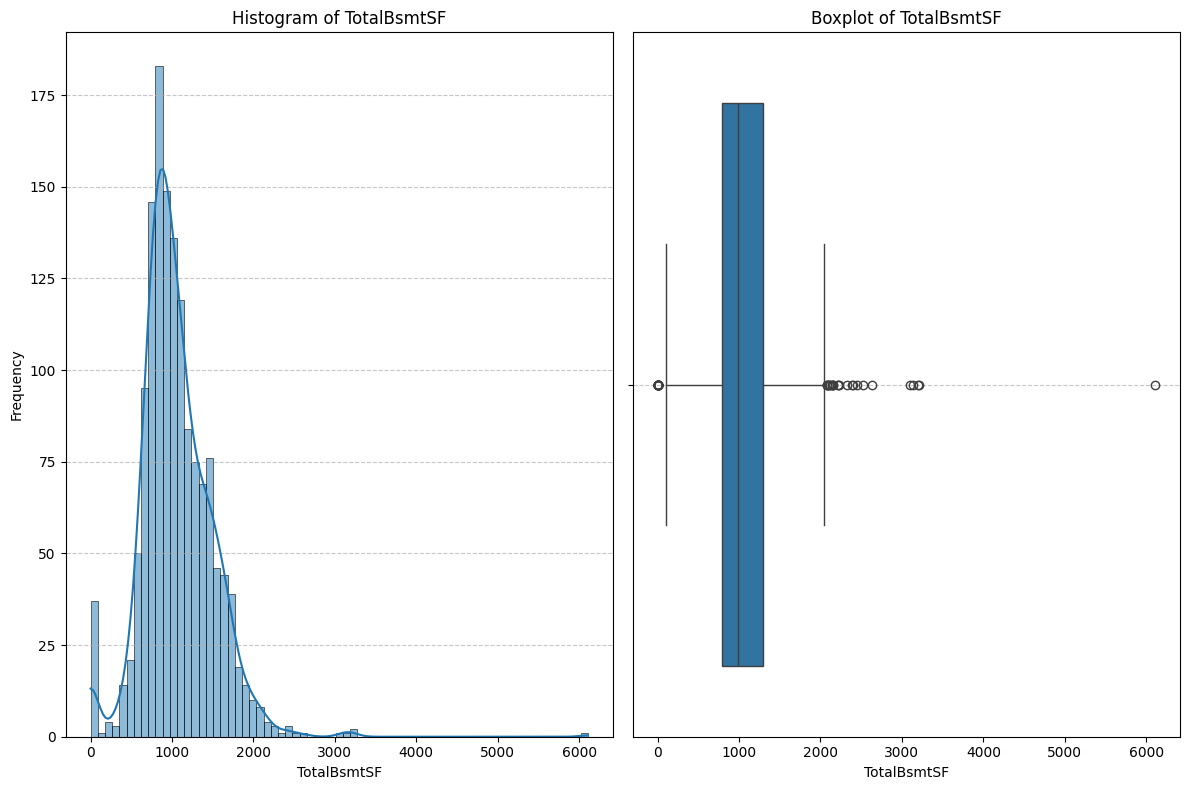

In [20]:
univariate_analyzer.analyze(df, 'TotalBsmtSF')

#### Insight:
- The histogram of `TotalBsmtSF` (total basement square footage) shows a right-skewed distribution. Most properties have a total basement size clustered below 1,500 square feet, with a noticeable peak around 1,000 square feet. A small number of properties have no basement (TotalBsmtSF = 0).
- The boxplot confirms the skewness and highlights the presence of outliers above 2,000 square feet, which represent properties with exceptionally large basements.
#### Implication:
- The right-skewness and outliers suggest that a log transformation could help stabilize the variance and normalize the distribution for predictive modeling.
- Properties with no basement (TotalBsmtSF = 0) might need to be handled separately, as their contribution to models could differ significantly from those with a basement.
- `TotalBsmtSF` is likely a strong predictor of property value, as basement size often correlates with overall living space. Investigating its correlation with the target variable would help confirm its importance.
- Segmenting the data into categories based on basement size (e.g., small, medium, large basements) could provide additional interpretability in the analysis.
### 1stFlrSF

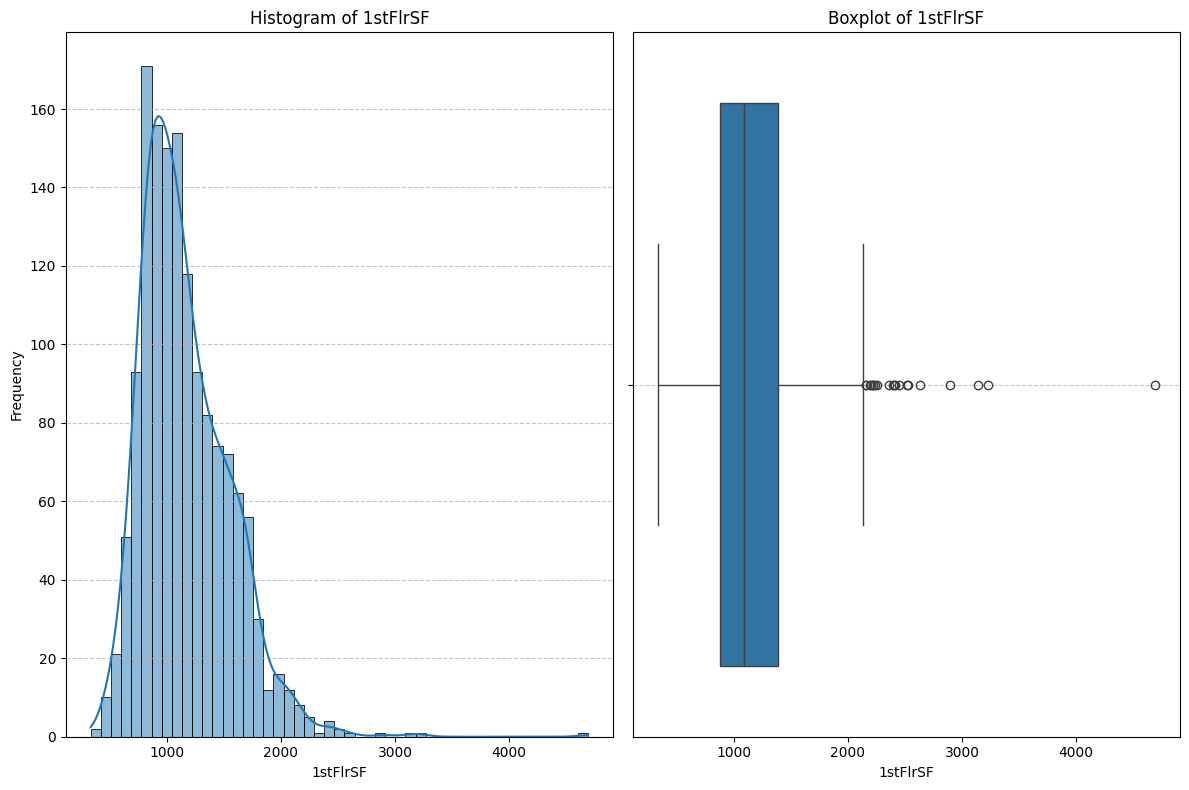

In [21]:
univariate_analyzer.analyze(df, '1stFlrSF')

#### Insight:
- The histogram of `1stFlrSF` (first-floor square footage) shows a slightly right-skewed distribution, with most properties having first-floor areas concentrated between approximately 800 and 1,800 square feet. There is a noticeable peak around 900 square feet.
- The boxplot reveals a compact interquartile range, with several outliers extending beyond 2,300 square feet. These outliers represent properties with exceptionally large first floors.
#### Implication:
- The right skew and presence of high-value outliers suggest that a log transformation or other normalization technique might help stabilize variance if `1stFlrSF` is used in predictive modeling.
- Given its centrality in property structure, `1stFlrSF` is likely a strong predictor of property value. 
- Large outliers may represent high-value or custom-built homes, which could disproportionately affect models like linear regression
### 2ndFlrSF

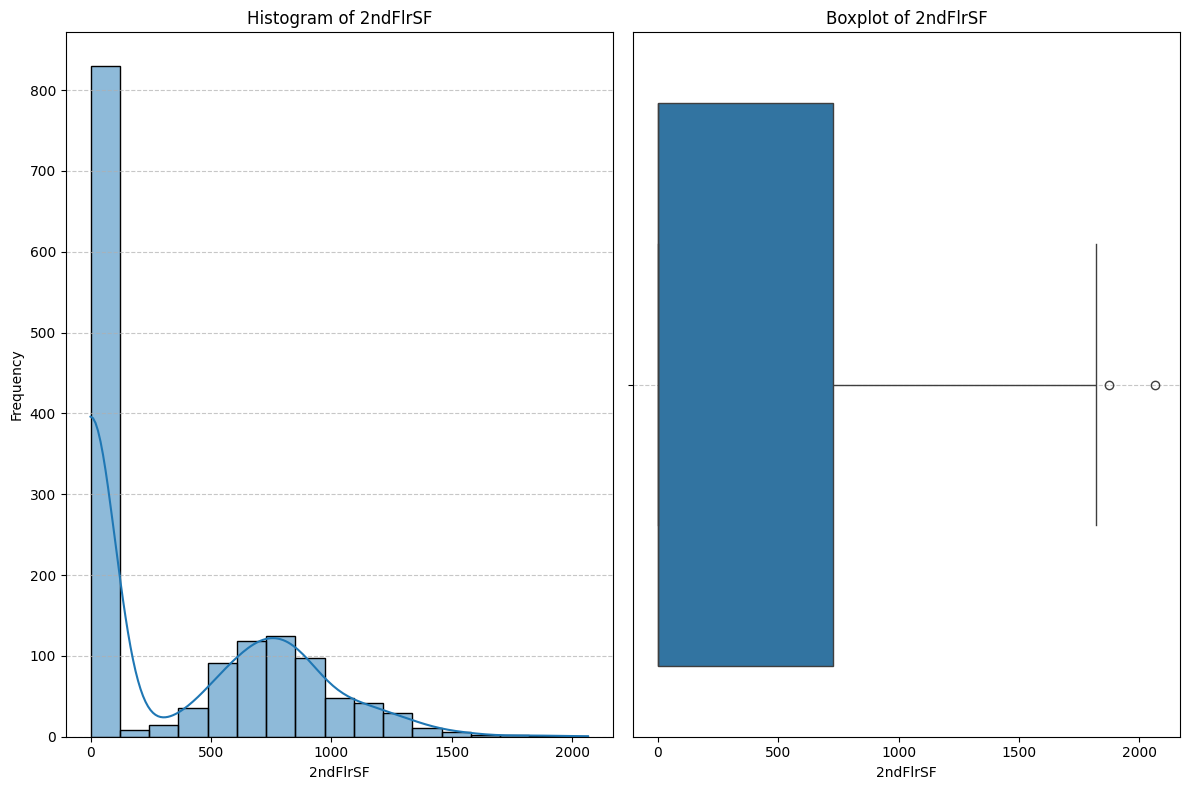

In [22]:
univariate_analyzer.analyze(df, '2ndFlrSF')

#### Insight:
- The histogram of `2ndFlrSF` (second-floor square footage) shows a strongly right-skewed distribution, with a large number of properties having zero square footage. This indicates that many properties in the dataset are single-story homes without a second floor.
- For properties with a non-zero `2ndFlrSF`, most values range between 500 and around 1,200 square feet, with a peak around 700–800 square feet.
- The boxplot highlights the variability of non-zero values, with a few outliers above around 1,700 square feet.
#### Implication:
- The high frequency of zero values suggests that this feature can be split into two components: a binary variable to indicate whether a property has a second floor (2ndFlrSF > 0) and a numerical variable for the square footage of the second floor.
- Skewness could impact predictive models; applying a log transformation to non-zero values might reduce skewness and stabilize variance.
### LowQualFinSF

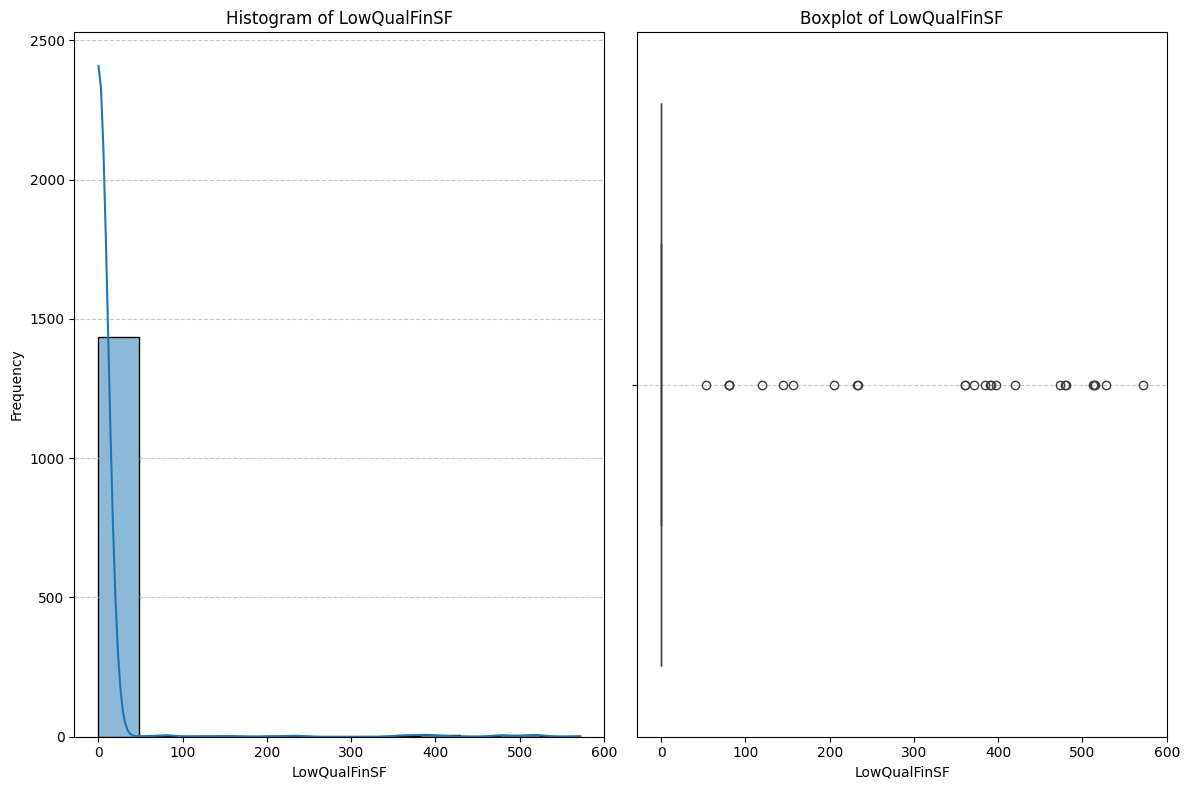

In [23]:
univariate_analyzer.analyze(df, 'LowQualFinSF')

#### Insight:
- The histogram of LowQualFinSF (low-quality finished square footage) reveals a highly right-skewed distribution, with the vast majority of properties having zero square footage for low-quality finished areas. This suggests that most properties in the dataset do not have any low-quality finished spaces.
- The boxplot shows several outliers above 100 square feet, representing properties with relatively larger areas of low-quality finishing.
#### Implication:
- Since most properties have zero values for LowQualFinSF, this feature could be converted into two components:
    - A binary indicator (e.g., LowQualFinSF > 0) to capture the presence of low-quality finished areas.
    - A numerical feature for non-zero values to quantify the size of such areas.
- The skewness indicates that transformations may not be necessary unless the non-zero values play a significant role in modeling. However, their rarity might limit their predictive contribution.
### GrLivArea

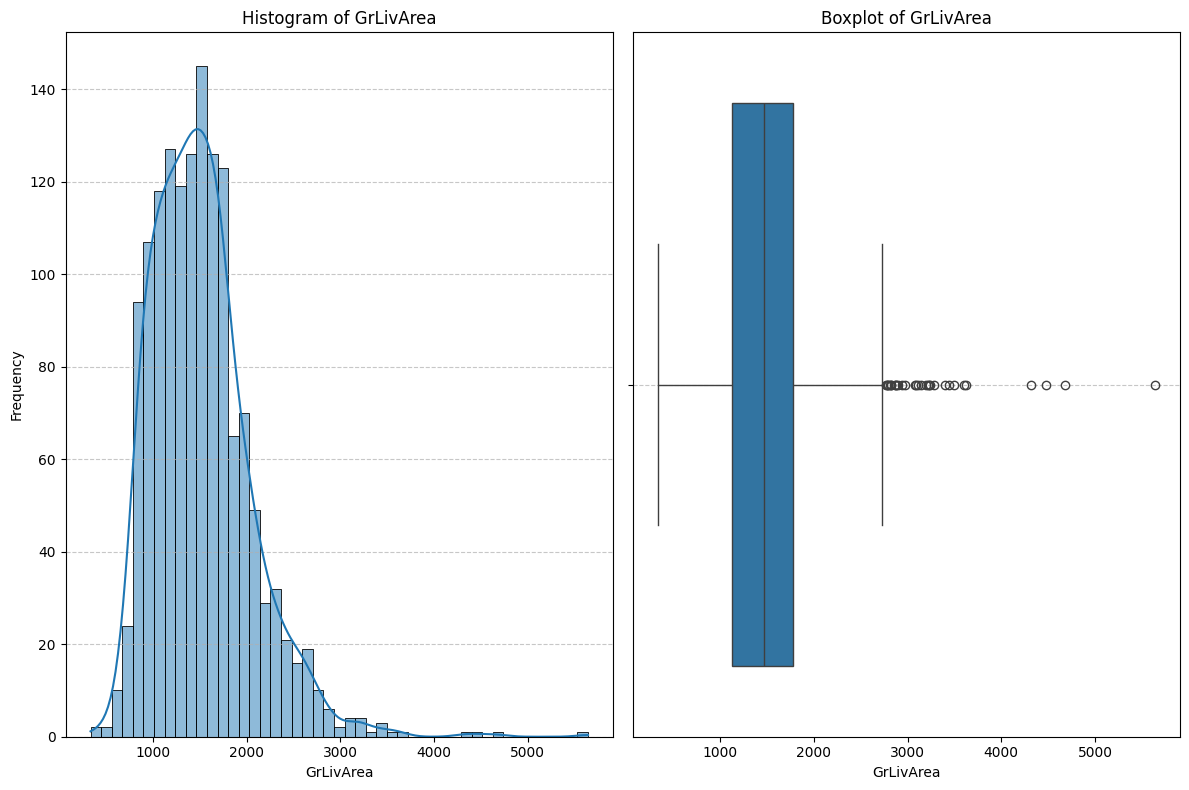

In [24]:
univariate_analyzer.analyze(df, 'GrLivArea')

#### Insight:
- The histogram of GrLivArea (above-ground living area) exhibits a slightly right-skewed distribution, with most properties having living areas between around 800 and 2,000 square feet. The distribution peaks around 1,500 square feet.
- The boxplot highlights a few outliers with exceptionally large living areas exceeding 3,000 square feet, which may represent luxury or custom-built properties.
#### Implication:
- The slight skewness and presence of outliers suggest that a log transformation could stabilize the variance and normalize the distribution, especially for models sensitive to skewness.
- `GrLivArea` is likely one of the strongest predictors of property value (`SalePrice`), as living area is typically directly correlated with home prices.
- The outliers may disproportionately influence models like linear regression. Careful handling, such as capping or separate analysis of luxury properties, might be required.
### BsmtFullBath

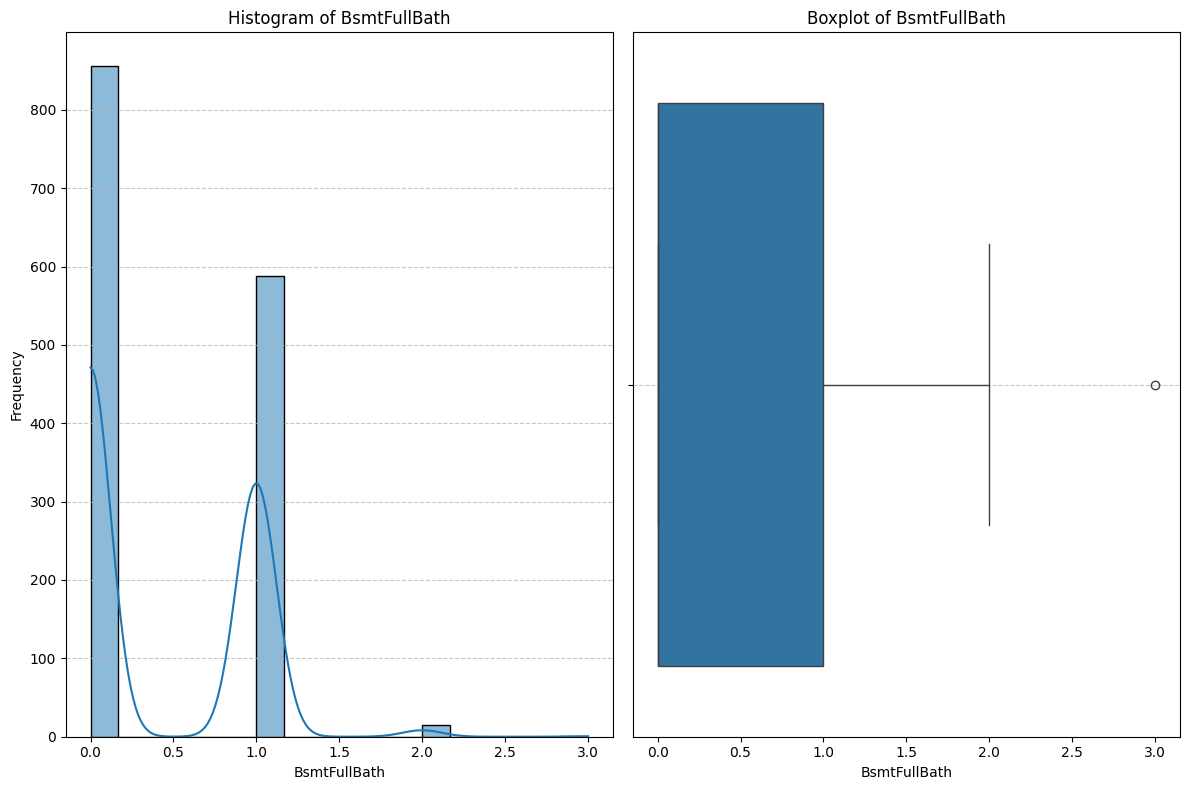

In [25]:
univariate_analyzer.analyze(df, 'BsmtFullBath')

#### Insight:
- The histogram of `BsmtFullBath` (number of full bathrooms in the basement) reveals a discrete distribution, with the majority of properties having either 0 or 1 full bathroom in the basement. Very few properties have more than 1 full basement bathroom.
- The boxplot confirms this trend, with minimal variation and one noticeable outlier where a property has 3 basement full bathrooms.
#### Implication:
- Since the variable is discrete and dominated by 0 and 1, it should be treated as a categorical variable in predictive models. If the presence of a basement bathroom strongly correlates with property value, I will consider creating a binary feature to indicate its presence.
- Properties with multiple basement bathrooms (outliers) might represent luxury homes or unique designs.
### BsmtHalfBath

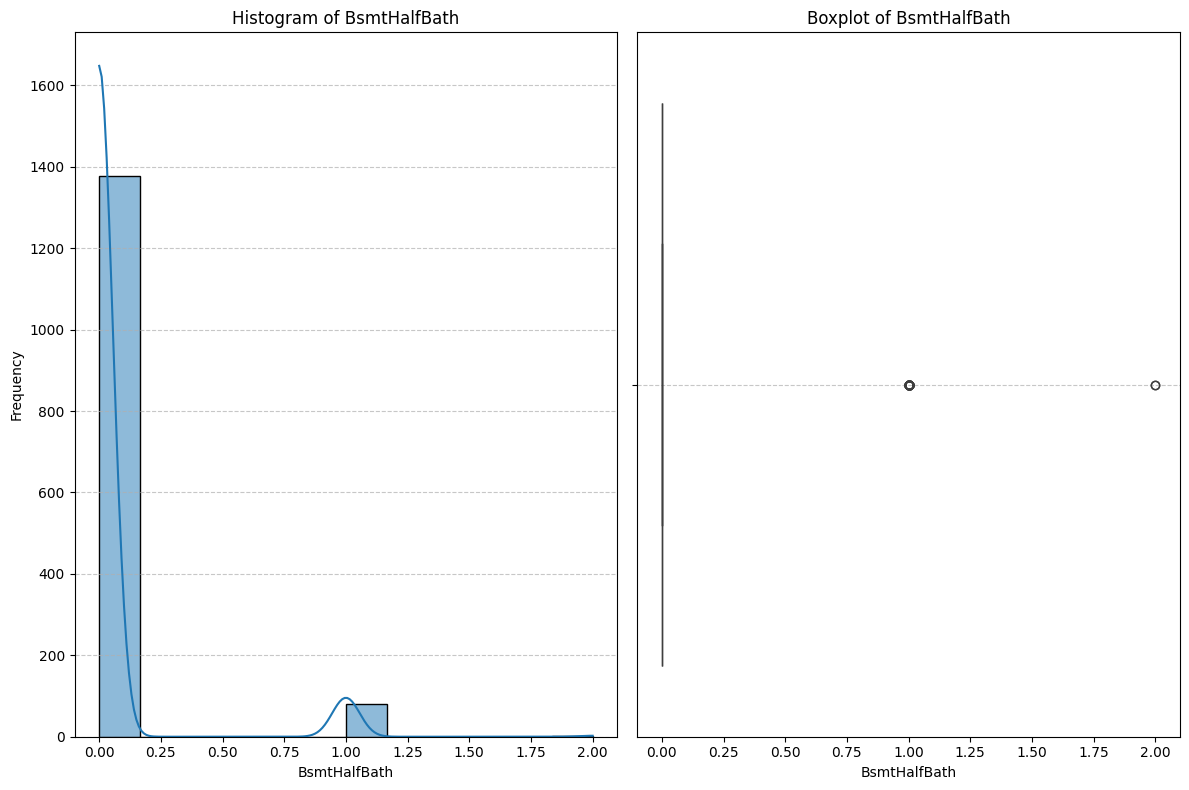

In [26]:
univariate_analyzer.analyze(df, 'BsmtHalfBath')

#### Insight:
- The histogram of `BsmtHalfBath` (number of half bathrooms in the basement) shows that the vast majority of properties have zero half bathrooms in the basement, with a small proportion having one. Very few properties have two half bathrooms, which appear as outliers in the boxplot.
- The boxplot confirms a sparse distribution, with most values concentrated at zero and very little variation.
#### Implication:
- Given the high frequency of zero values, this feature can be simplified into a binary variable indicating the presence of a half bathroom in the basement to improve model interpretability.
- Properties with more than one half bathroom are rare outliers. These may represent unique property configurations and could either be capped or treated separately.
- Since `BsmtHalfBath` likely has limited predictive power due to its sparsity, its correlation with the target variable should be evaluated to determine its relevance in modeling.
### FullBath

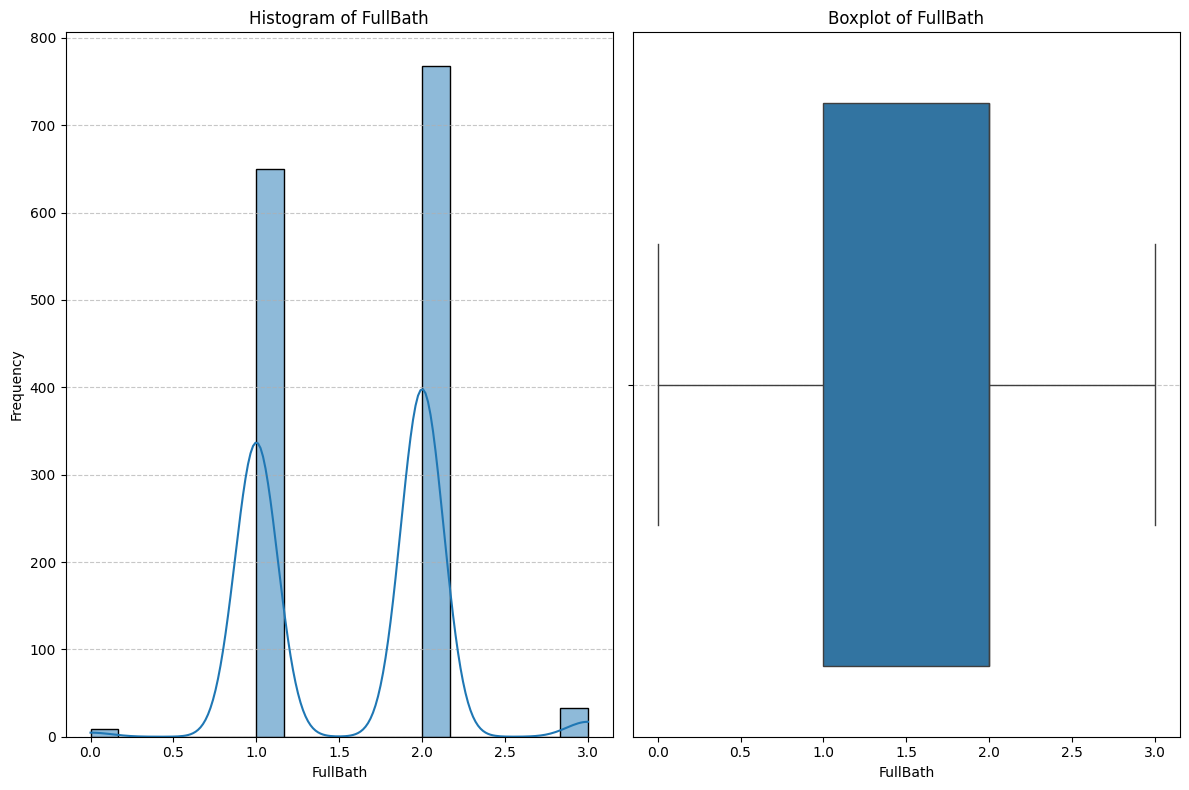

In [27]:
univariate_analyzer.analyze(df, 'FullBath')

#### Insight:
- The histogram of FullBath (number of full bathrooms above ground) shows a discrete distribution, with the majority of properties having either 1 or 2 full bathrooms. A smaller proportion has no full bathroom or more than 2 full bathrooms.
- The boxplot reveals that most of the data falls within the range of 1–2 bathrooms, with no significant outliers.
#### Implication:
- As a discrete variable, FullBath is already well-suited for predictive modeling without requiring transformations.
- The majority of properties having 1–2 full bathrooms indicates this feature's strong potential as a predictor, especially when combined with other space-related variables like GrLivArea.
- Homes with more than 2 full bathrooms, while less frequent, could represent higher-end properties
### HalfBath

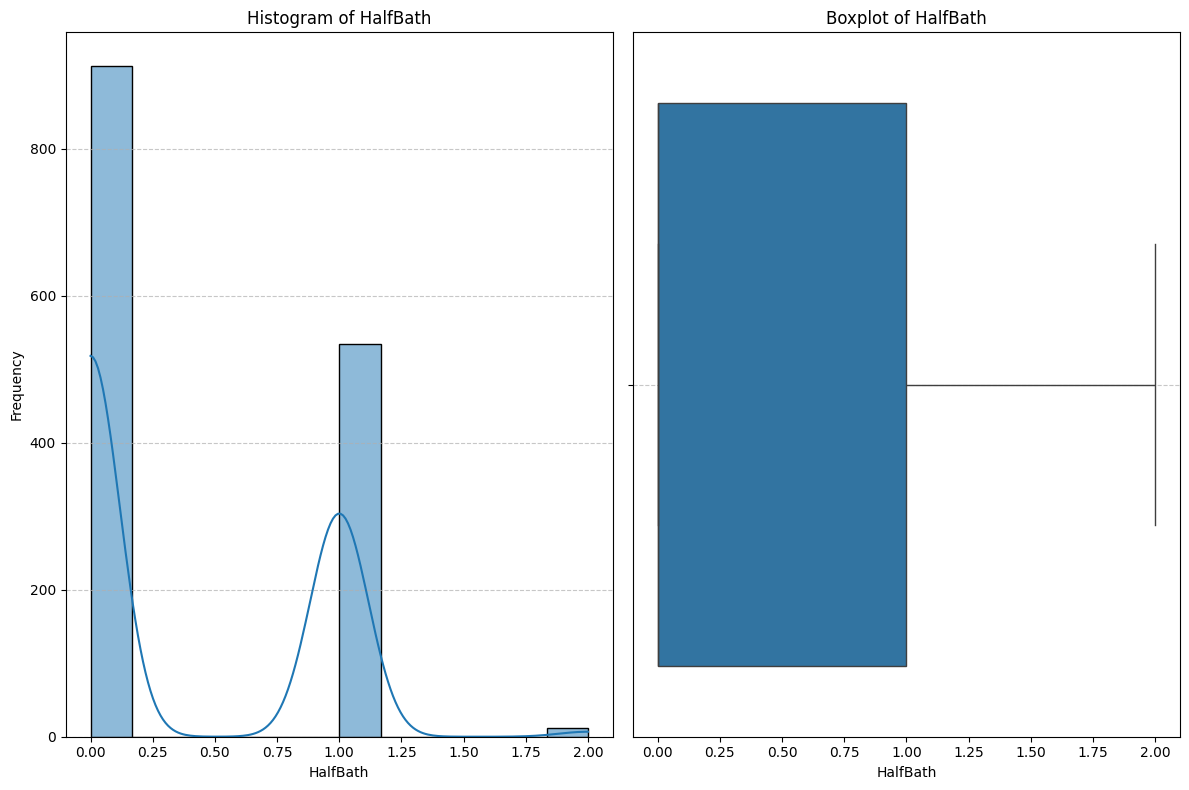

In [28]:
univariate_analyzer.analyze(df, 'HalfBath')

#### Insight:
- The histogram of `HalfBath` (number of half bathrooms above ground) shows a discrete distribution, with most properties having either 0 or 1 half bathroom. Very few properties have 2 half bathrooms.
- The boxplot aligns with the histogram, confirming the concentration of values at 0 and 1, with a smaller range of variability and no significant outliers.
#### Implication:
- As a discrete variable with a simple range of values, `HalfBath` can be used directly in predictive models or converted into a binary indicator (e.g., presence of a half bathroom, HalfBath > 0) if necessary for model interpretability.
- Properties with 2 half bathrooms are relatively rare and might represent unique or larger homes.
- Since bathrooms are a key factor in property valuation, this feature likely has a significant relationship with `SalePrice` and should be analyzed alongside other related variables like `FullBath`.

### BedroomAbvGr

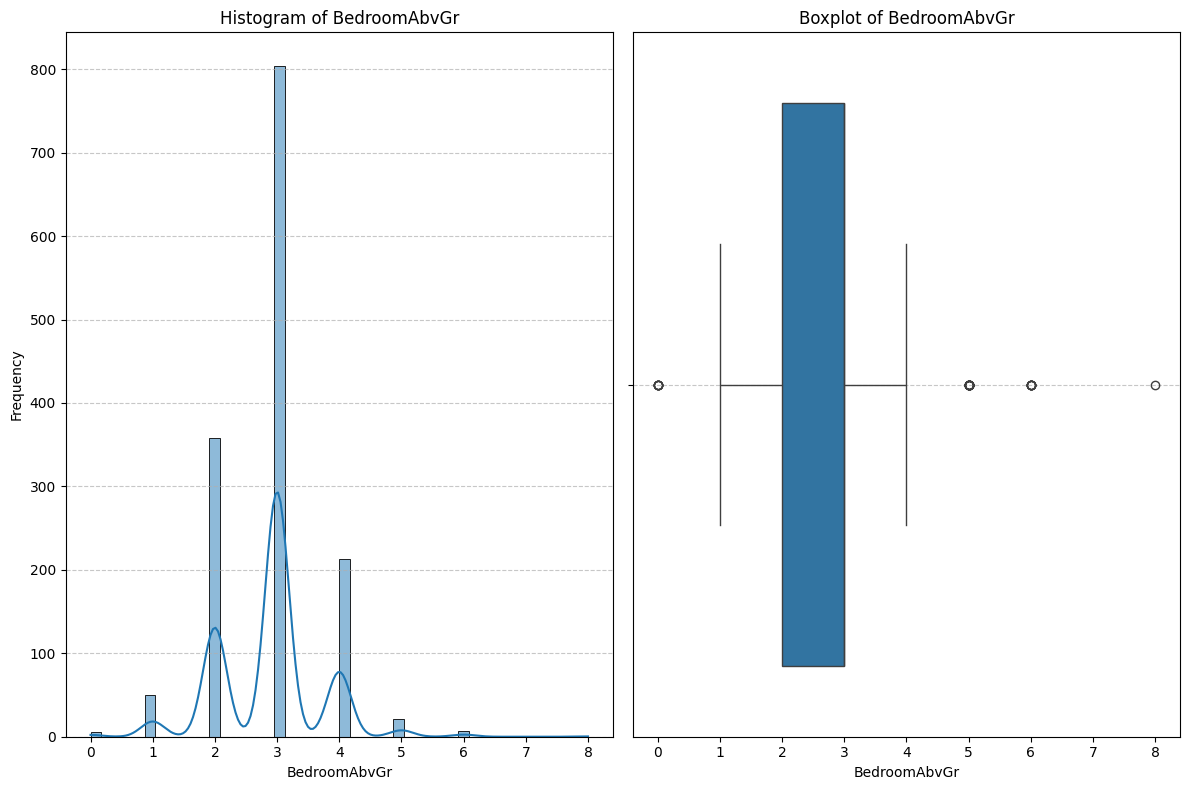

In [29]:
univariate_analyzer.analyze(df, 'BedroomAbvGr')

#### Insight:
- The histogram of `BedroomAbvGr` (number of bedrooms above ground) shows a discrete distribution, with the majority of properties having 2 or 3 bedrooms. Properties with 0, 1, or more than 3 bedrooms are relatively rare.
- The boxplot confirms this trend, with most properties falling within the interquartile range (2–3 bedrooms). A few properties with more than 4 bedrooms appear as mild outliers.
#### Implication:
- As a discrete variable with a compact range, BedroomAbvGr can be used directly in predictive models or analyzed as a categorical variable.
- Properties with unusually high or low numbers of bedrooms may correspond to unique property types (e.g., very small or luxury homes). These could be treated as special cases or analyzed separately depending on their relationship with the target variable (`SalePrice`).
- Bedrooms are often an important predictor of property value, but their impact may vary depending on how they interact with other features like `GrLivArea` or the number of bathrooms. Evaluating these relationships could enhance feature engineering and model performance.
### KitchenAbvGr

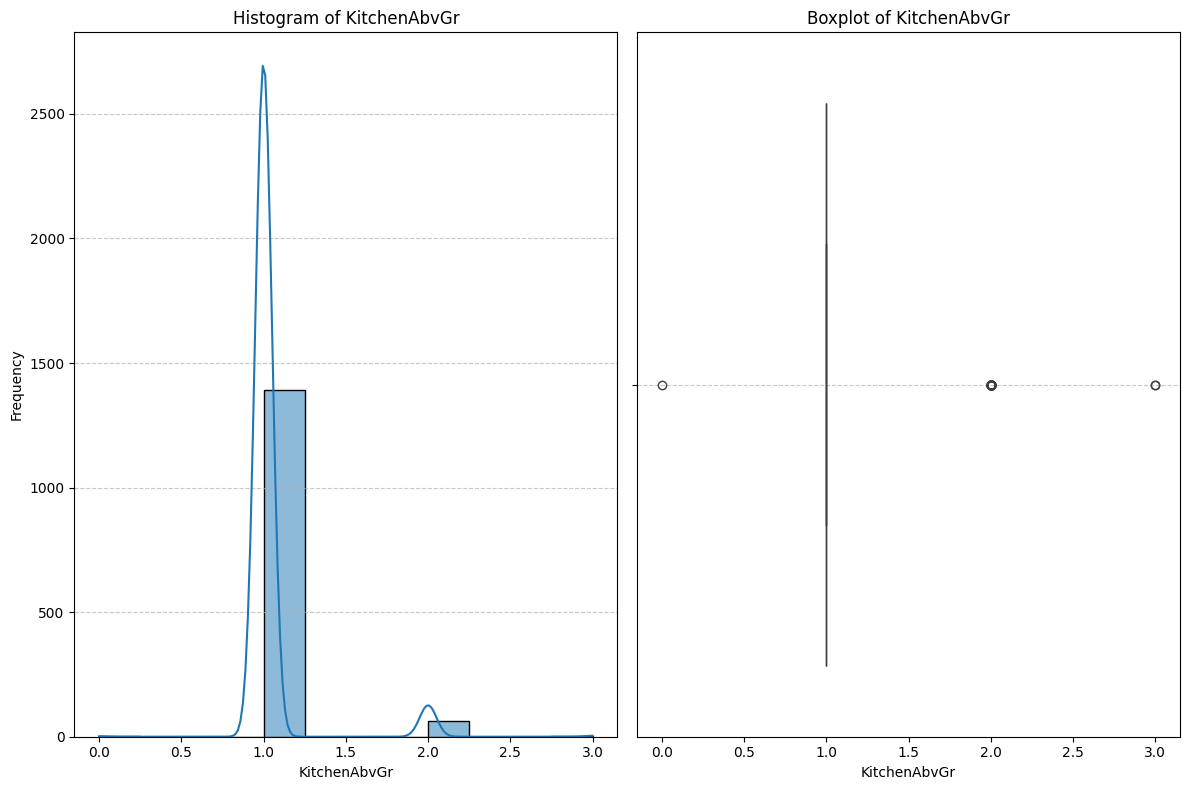

In [30]:
univariate_analyzer.analyze(df, 'KitchenAbvGr')

#### Insight:
- The histogram of `KitchenAbvGr` (number of kitchens above ground) shows a discrete distribution, with the majority of properties having exactly 1 kitchen. A very small proportion of properties have 2 kitchens, and even fewer have 3.
- The boxplot reflects this pattern, with almost all values clustered at 1. Properties with more than 1 kitchen are rare outliers.
#### Implication:
- Since most properties have 1 kitchen, this variable can be treated as categorical or binary, with a separate category for outliers (e.g., "multiple kitchens").
- The outliers with 2 or more kitchens likely represent unique or luxury properties. Analyzing their correlation with the target variable (`SalePrice`) may reveal whether these properties significantly impact predictions.
- Given the lack of variability in this feature, its overall importance in modeling may be limited unless multiple kitchens are strongly associated with higher property values.
### TotRmsAbvGrd

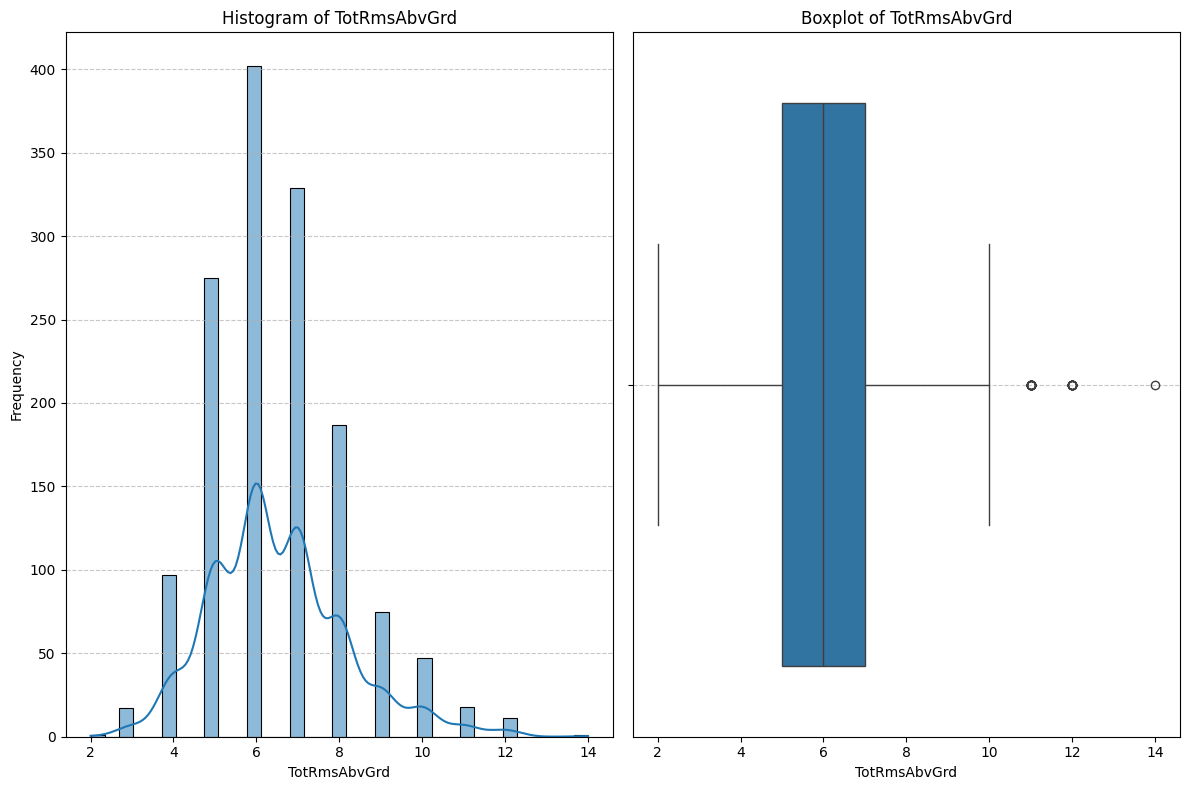

In [31]:
univariate_analyzer.analyze(df, 'TotRmsAbvGrd')

#### Insight:
- The histogram of `TotRmsAbvGrd` (total rooms above ground) shows a distribution centered around 5 to 8 rooms, with a peak at 6 rooms. Properties with fewer than 4 rooms or more than 10 rooms are relatively rare.
- The boxplot highlights that most properties fall within the range of 5 to 8 rooms. A few properties with more than 10 rooms are identified as outliers.
#### Implication:
- As a discrete numerical variable, `TotRmsAbvGrd` can be used directly in predictive models. The variability in the number of rooms makes it a potentially significant feature for property valuation, likely correlating with `GrLivArea` and `SalePrice`.
- The outliers (homes with more than 10 rooms) likely represent larger or luxury properties and may need separate handling depending on their influence on the target variable.
- If needed for interpretability, `TotRmsAbvGrd` can be grouped into categories (e.g., small, medium, large homes) or analyzed alongside other features like the number of bedrooms and bathrooms to assess combined living space.
### Fireplaces

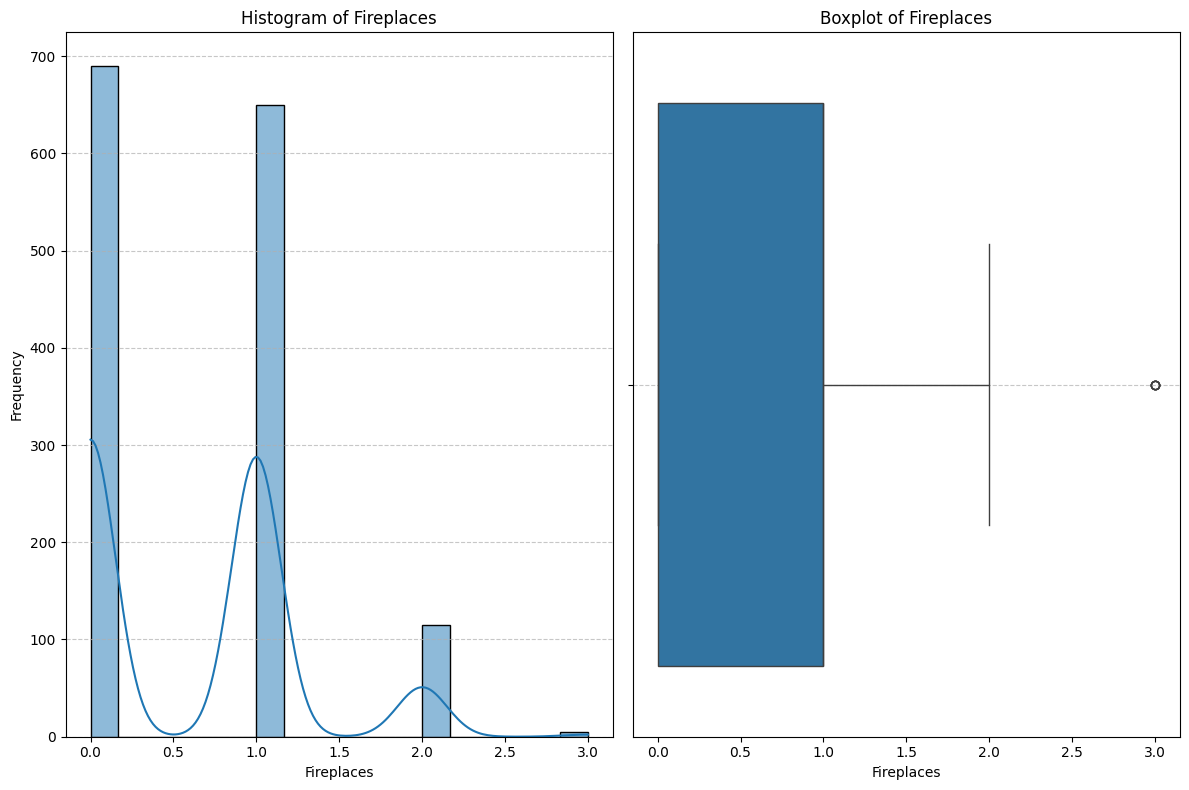

In [32]:
univariate_analyzer.analyze(df, 'Fireplaces')

#### Insight:
- The histogram of `Fireplaces` (number of fireplaces in a property) shows a discrete distribution, with the majority of properties having either 0 or 1 fireplace. A smaller proportion of properties have 2 fireplaces, and very few have 3.
- The boxplot confirms this trend, with the majority of properties having no fireplaces or 1 fireplace. Properties with 3 fireplaces are rare and appear as outliers.
### Implication:
- Since most properties have either no fireplaces or one, this variable can be treated as a categorical or binary feature.
- Properties with 2 or more fireplaces might represent luxury homes, which could have a strong correlation with `SalePrice`. These outliers may need further analysis to assess their impact on predictive models.
- As fireplaces are often considered a desirable feature in homes, this variable likely has some influence on property valuation. Exploring its interaction with other variables (e.g., `GrLivArea` or `TotRmsAbvGrd`) could provide additional insights.
### GarageYrBlt

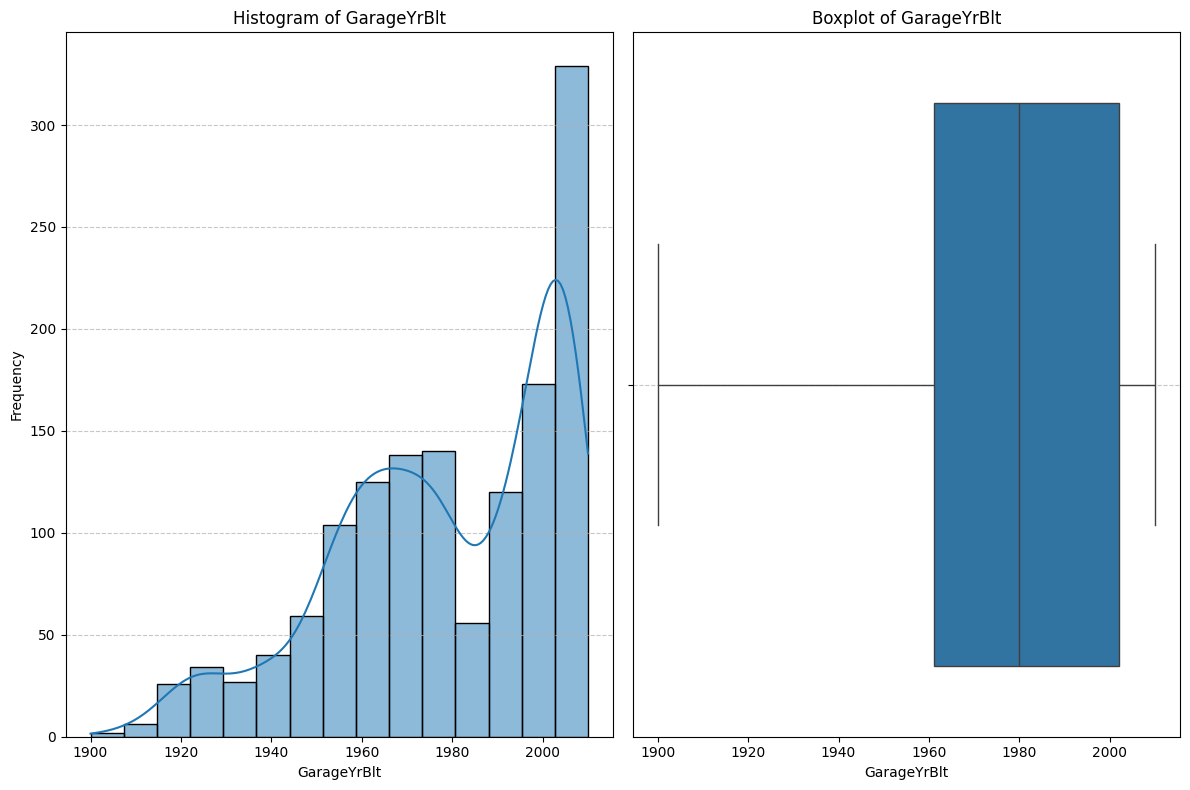

In [33]:
univariate_analyzer.analyze(df, 'GarageYrBlt')

#### Insight:
- The histogram of `GarageYrBlt` (year the garage was built) shows a distribution skewed toward more recent years, with a significant peak around the 2000s. Older garages (pre-1950) are relatively rare, and the frequency gradually increases from 1950 onward.
- The boxplot confirms that the majority of garages were built between 1950 and 2000.
#### Implication:
- `GarageYrBlt` could be used as a numerical variable or transformed into age by subtracting it from the current year (e.g., GarageAge = CurrentYear - GarageYrBlt). This transformation might better capture the impact of garage age on property value.
- The distribution aligns with the general property trends, and its correlation with `SalePrice` should be analyzed. Newer garages might add more value to a property, making this feature an important predictor.
### GarageCars

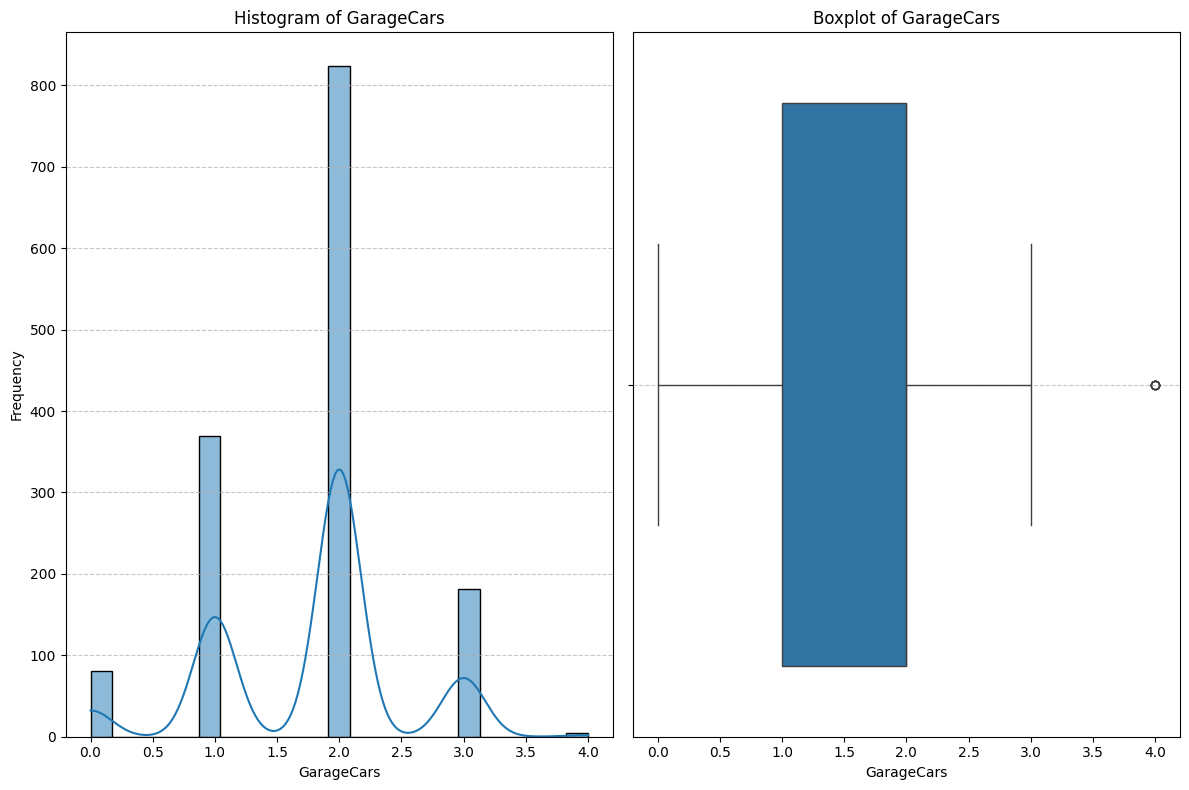

In [34]:
univariate_analyzer.analyze(df, 'GarageCars')

#### Insight:
- The histogram of `GarageCars` (number of cars the garage can hold) shows a discrete distribution, with the majority of properties having garages that can hold 2 cars. A significant portion also has 1-car garages, and a smaller number have garages for 3 cars. Garages accommodating 0 or 4 cars are rare.
- The boxplot confirms that most values fall between 1 and 2 cars, with properties having 4-car garages appearing as outliers.
#### Implication:
- As a discrete variable, `GarageCars` can be directly used in predictive models or analyzed as a categorical feature.
- Properties with larger garages (3 or more cars) likely represent higher-end homes and could be important in explaining variations in property value (`SalePrice`). Exploring the relationship between `GarageCars` and the target variable could provide insights into its predictive significance.
- For properties with no garages, additional analysis could be performed to assess their impact on property value, as these properties might belong to a distinct segment of the market.
### GarageArea

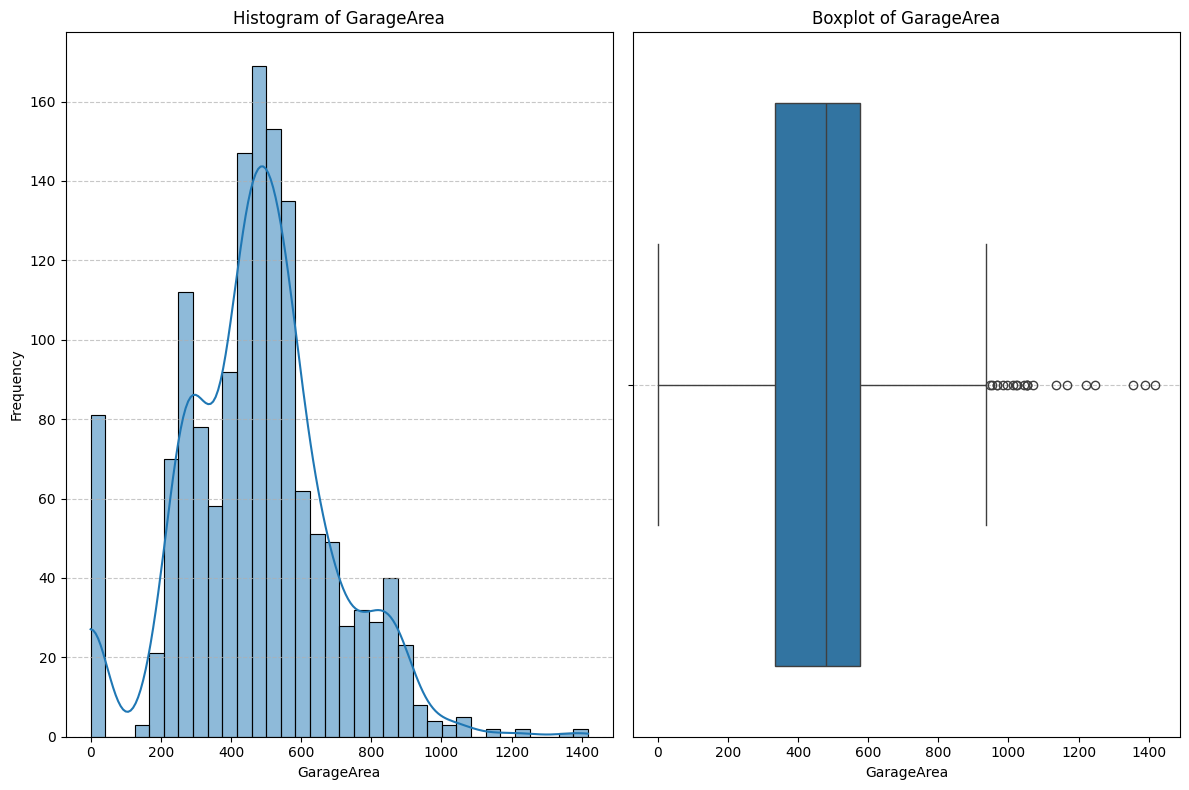

In [35]:
univariate_analyzer.analyze(df, 'GarageArea')

#### Insight:
- The histogram of `GarageArea` (total square footage of the garage) shows a right-skewed distribution, with most garages having an area between 200 and 600 square feet. A small number of garages have a larger area, exceeding 1,000 square feet.
- The boxplot confirms that the majority of garage areas are concentrated around the interquartile range of 200–600 square feet, with outliers representing garages with very large areas.
#### Implication:
- `GarageArea` is a continuous variable and can be used directly in predictive models. The skewness suggests that a log transformation may be useful to normalize the distribution if required for linear models.
- Larger garages (outliers) may indicate luxury properties, which could have a significant impact on `SalePrice`.
- `GarageArea` is likely highly correlated with `GarageCars`, but it provides more granularity and may capture differences between properties with similar car capacities but varying total garage space.
### WoodDeckSF

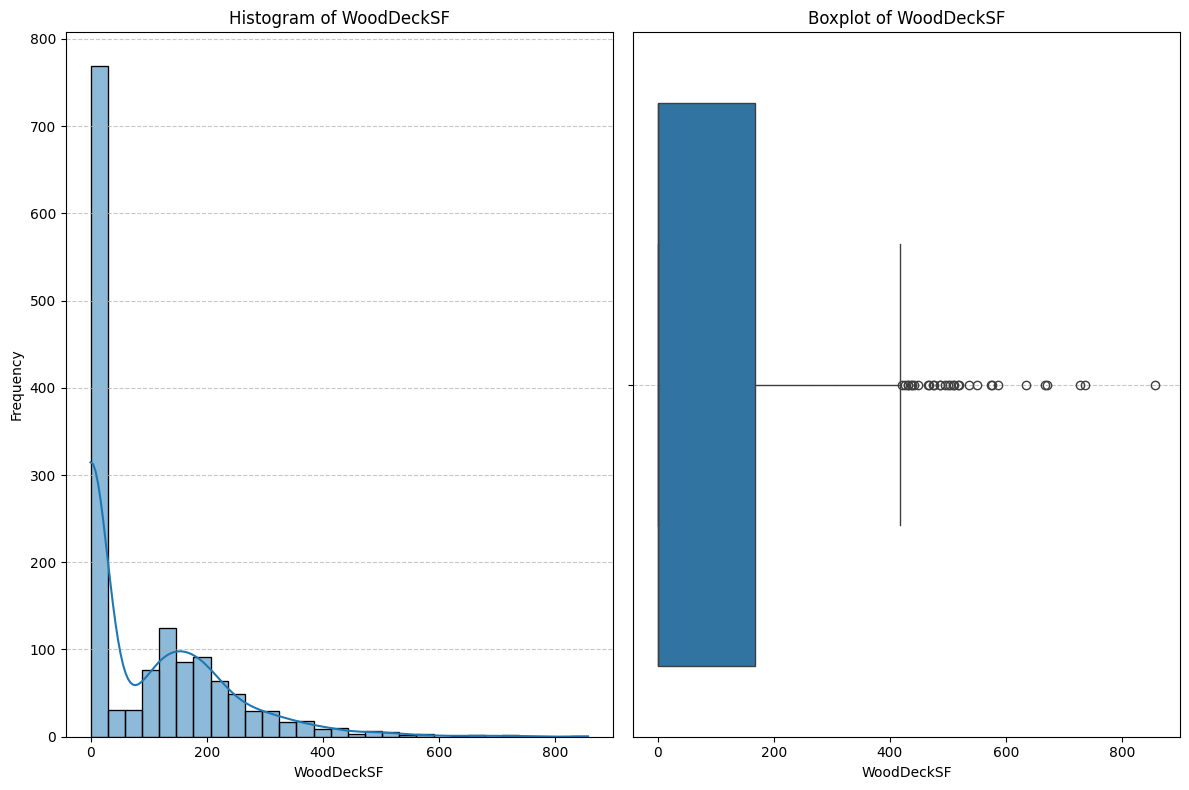

In [36]:
univariate_analyzer.analyze(df, 'WoodDeckSF')

#### Insight:
- The histogram of `WoodDeckSF` (square footage of wood decks) is highly right-skewed, with a large proportion of properties having no wood decks or very small decks (under 200 square feet). There are relatively few properties with decks larger than 400 square feet, and the distribution tails off significantly.
- The boxplot confirms that the majority of values lie below 200 square feet, with a few outliers representing very large decks exceeding 400 square feet.
#### Implication:
- This skewness indicates that most properties either do not have wood decks or have modestly sized ones. Larger wood decks may be associated with higher property values, but they represent a smaller subset of properties.
- If used in predictive models, a log or square root transformation might help to normalize this feature, especially if it is correlated with the target variable (`SalePrice`).
- Properties with very large decks (outliers) could be unique in terms of property design or luxury features. These cases should be analyzed further to understand their impact on the dataset.
### OpenPorchSF

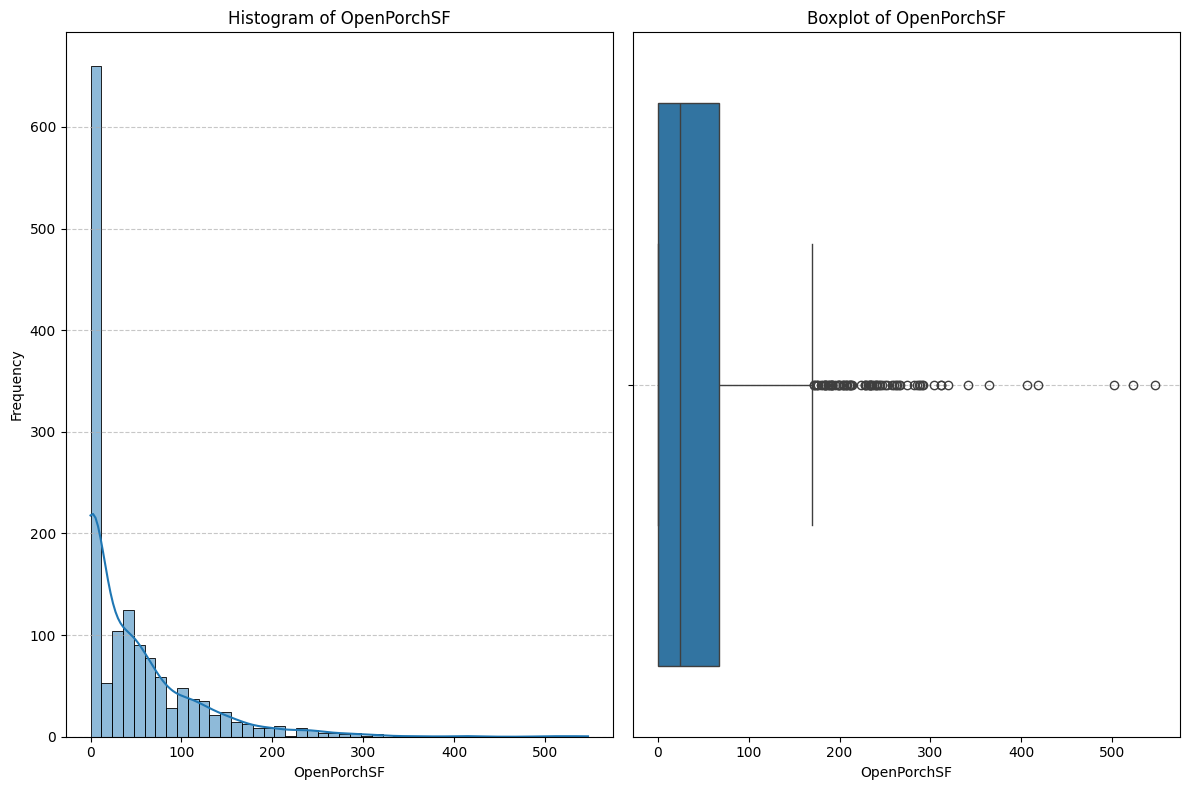

In [37]:
univariate_analyzer.analyze(df, 'OpenPorchSF')

#### Insight:
- The histogram of `OpenPorchSF` (square footage of open porches) shows a highly right-skewed distribution. A significant proportion of properties have no open porches, with a steep decline in frequency as the square footage increases.
- The boxplot confirms that most properties have open porch square footage below 100, with several outliers extending beyond 180 square feet. These outliers represent properties with exceptionally large open porches.
#### Implication:
- The skewness suggests that open porches are either absent or relatively small in most properties. Larger open porches might add unique value to these properties and could be considered a luxury feature.
- A log or square root transformation of `OpenPorchSF` could normalize the data for use in models, particularly if this feature significantly impacts the target variable (`SalePrice`).
- It may be worth investigating the correlation between `OpenPorchSF` and property value to determine its predictive power.
### EnclosedPorch

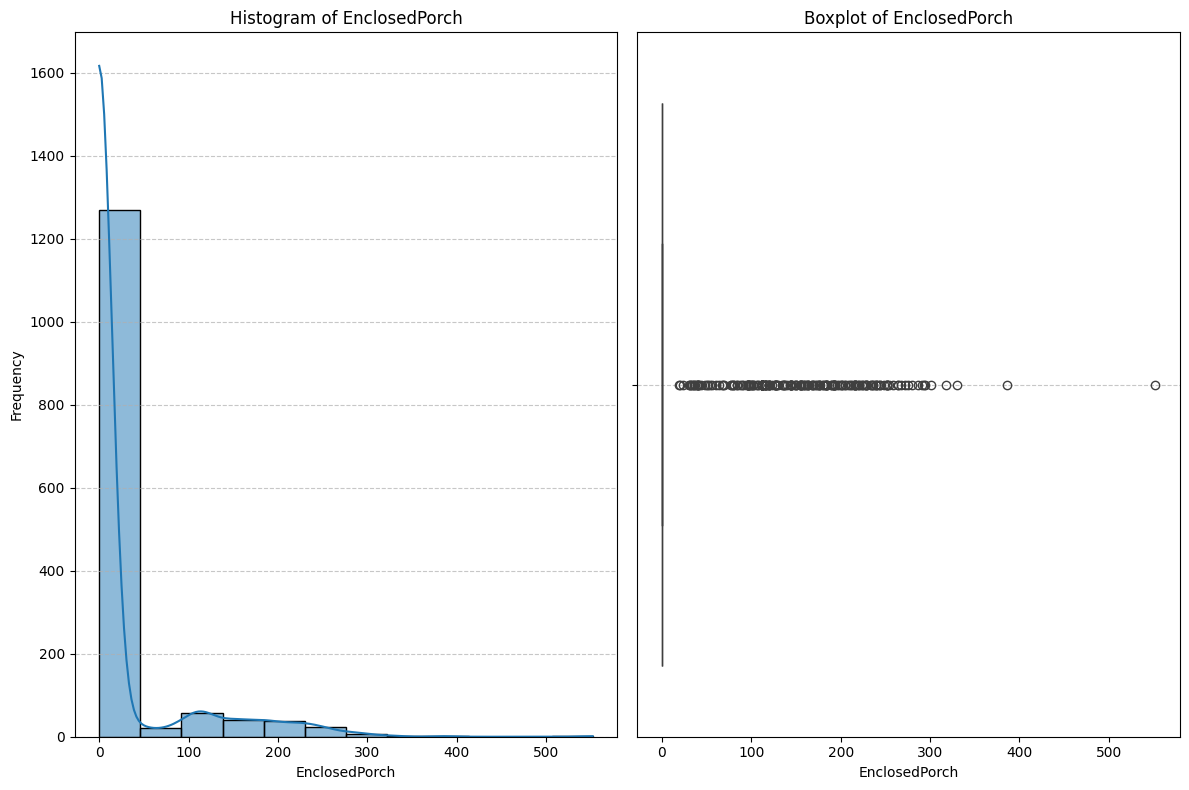

In [38]:
univariate_analyzer.analyze(df, 'EnclosedPorch')

#### Insight:
- The histogram of `EnclosedPorch` (square footage of enclosed porches) shows a highly right-skewed distribution, with most properties having zero square footage. A small percentage of properties have enclosed porches, typically less than 100 square feet.
- The boxplot corroborates this observation, with the bulk of the data lying close to zero and a few outliers extending beyond 300 square feet.
#### Implication:
- `EnclosedPorch` appears to be a rare feature, indicating it may be a distinguishing factor for certain homes. Its sparse nature suggests it might have limited influence on models unless heavily weighted or correlated with high property values.
- If this feature shows a strong relationship with the target variable, I will consider treating it as a categorical feature (presence vs. absence) or applying a transformation to normalize its skewed distribution.
### 3SsnPorch

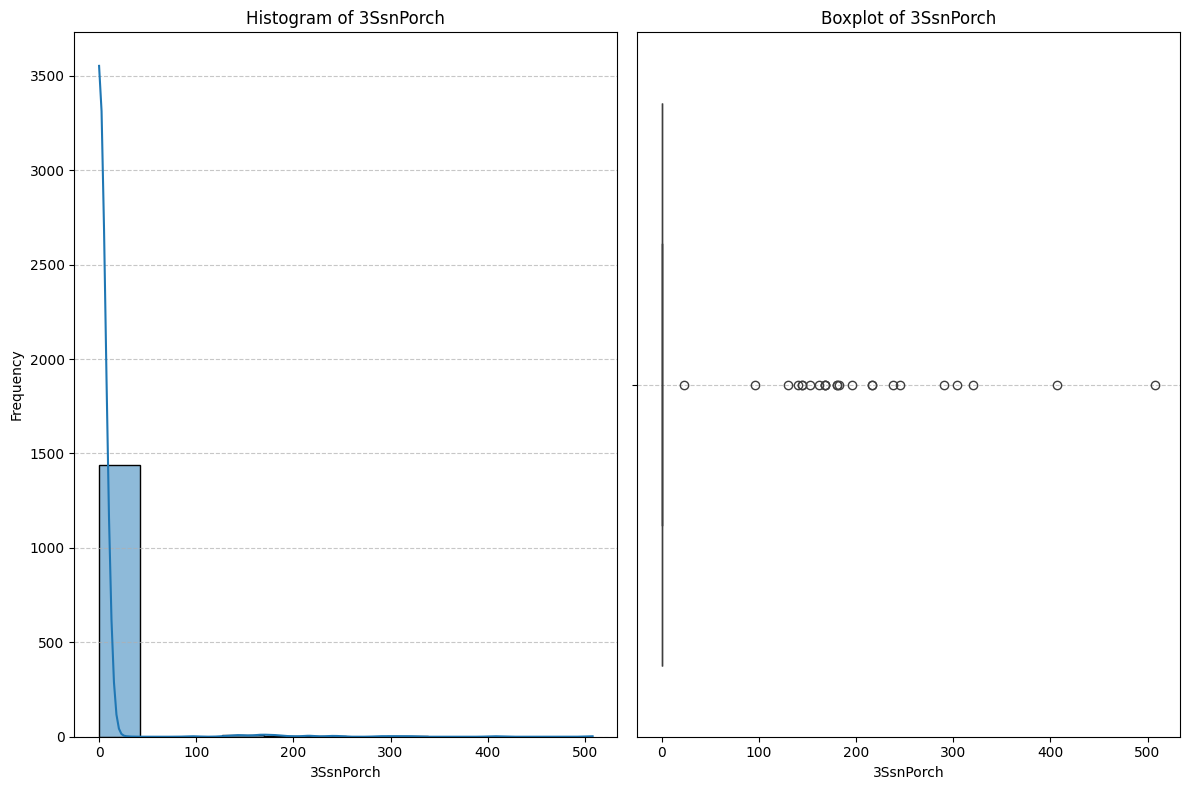

In [39]:
univariate_analyzer.analyze(df, '3SsnPorch')

#### Insight:
- The histogram for `3SsnPorch` (three-season porch area) shows that the vast majority of houses have no three-season porch. A small number of properties have some three-season porch area, typically below 150 square feet.
- The boxplot reveals a similar pattern, with most data concentrated at zero, and a few outliers with higher square footage extending up to 500 square feet.
#### Implication:
- This feature is sparse, with many zero values indicating no three-season porch for most properties. For modeling purposes, it might be beneficial to treat this as a binary feature or considering its sparsity while engineering features.
- If the feature shows a significant correlation with the target variable, its impact may be amplified by its rarity.
### ScreenPorch

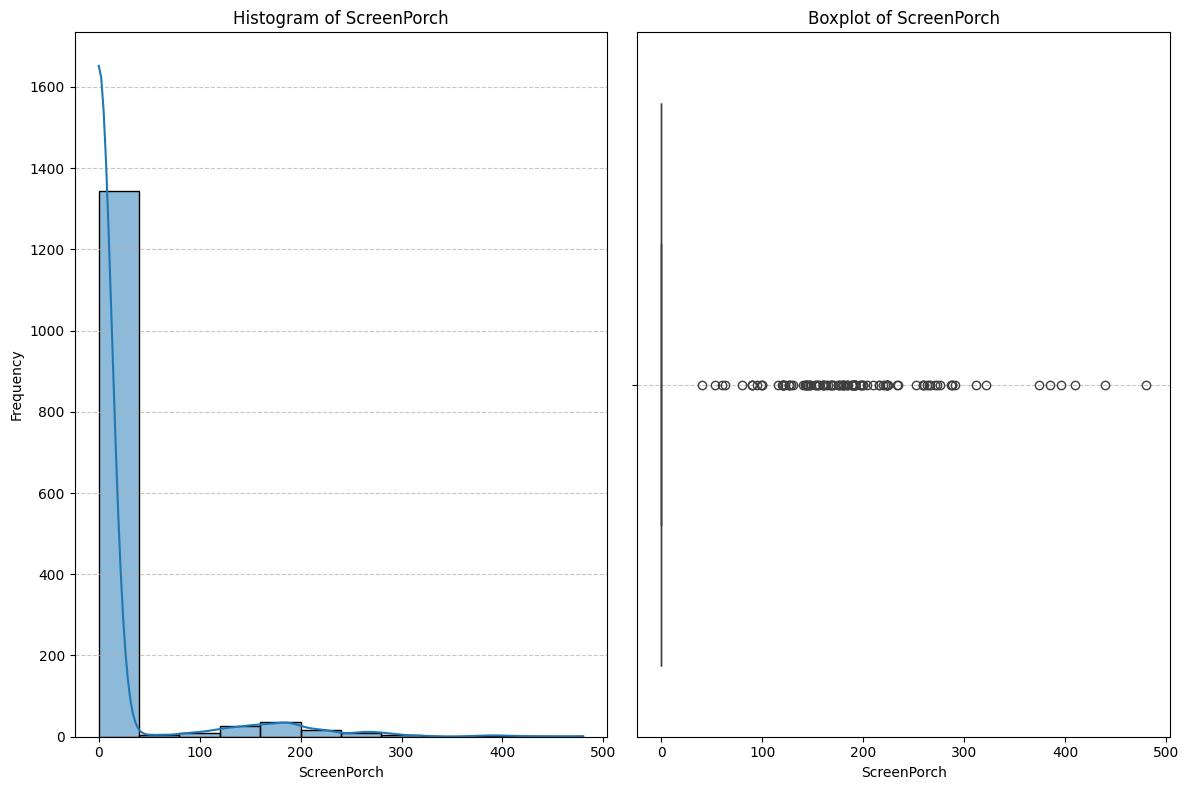

In [40]:
univariate_analyzer.analyze(df, 'ScreenPorch')

#### Insight:
- The histogram for `ScreenPorch` (screened porch area) shows a highly skewed distribution with most homes having no screened porch area.
- The boxplot highlights that a significant portion of the data is at zero, with a small number of properties having values ranging up to 500 square feet. Outliers are evident, as indicated by the dots far above the whiskers.
#### Implication:
- This feature is sparse, similar to 3SsnPorch. For analysis and modeling:
    - It could be transformed into a binary variable indicating the presence or absence of a screened porch.
    - Alternatively, further statistical tests can assess its correlation with the target variable to justify its inclusion in the model.
- If retained as is, the feature may require normalization or handling of outliers during preprocessing.
### PoolArea

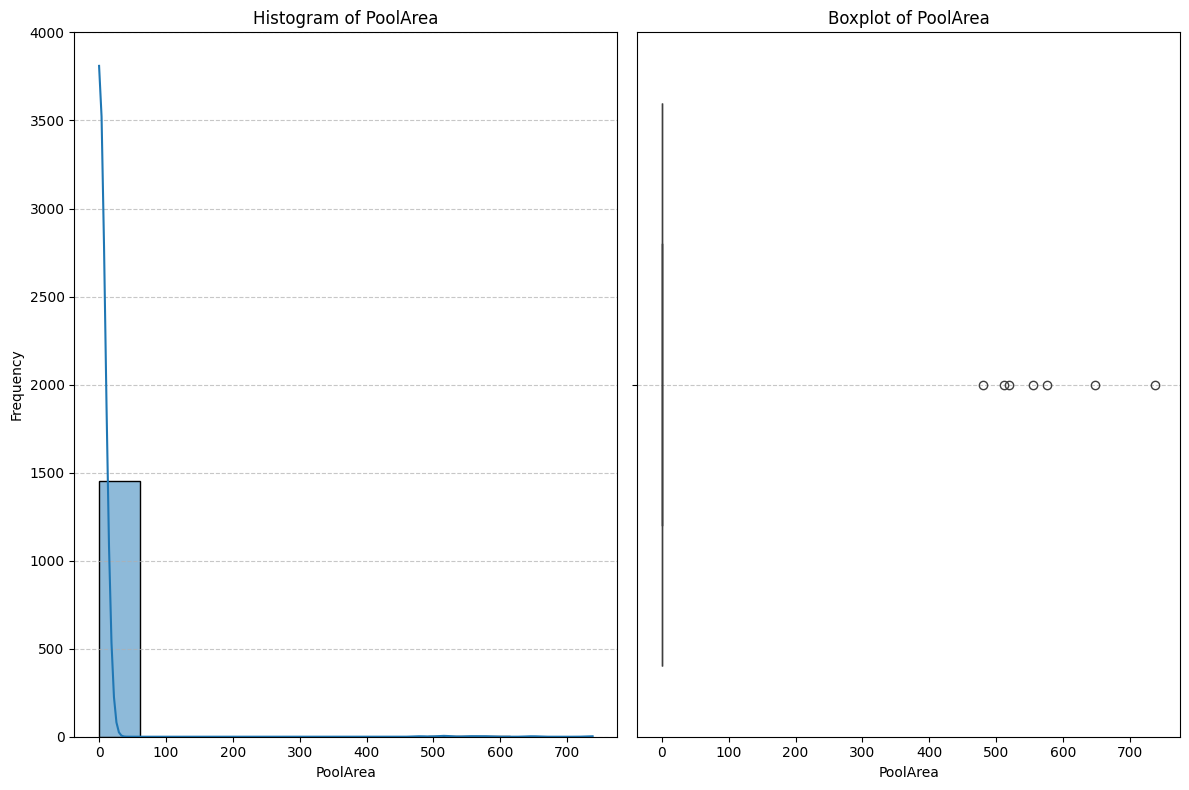

In [41]:
univariate_analyzer.analyze(df, 'PoolArea')

#### Insight:
- The histogram for `PoolArea` (pool area in square feet) is heavily skewed, with most values at zero, indicating that the majority of properties in the dataset do not have pools.
- The boxplot confirms this, showing a narrow interquartile range (IQR) near zero and a few significant outliers for properties with pools.
#### Implication:
- This variable has a high sparsity, making it a potential candidate for transformation into a binary indicator (e.g., HasPool: 1 for non-zero values and 0 otherwise).
- Alternatively, properties with pools can be analyzed separately, as they represent a distinct group that may influence certain outcomes.
### MiscVal

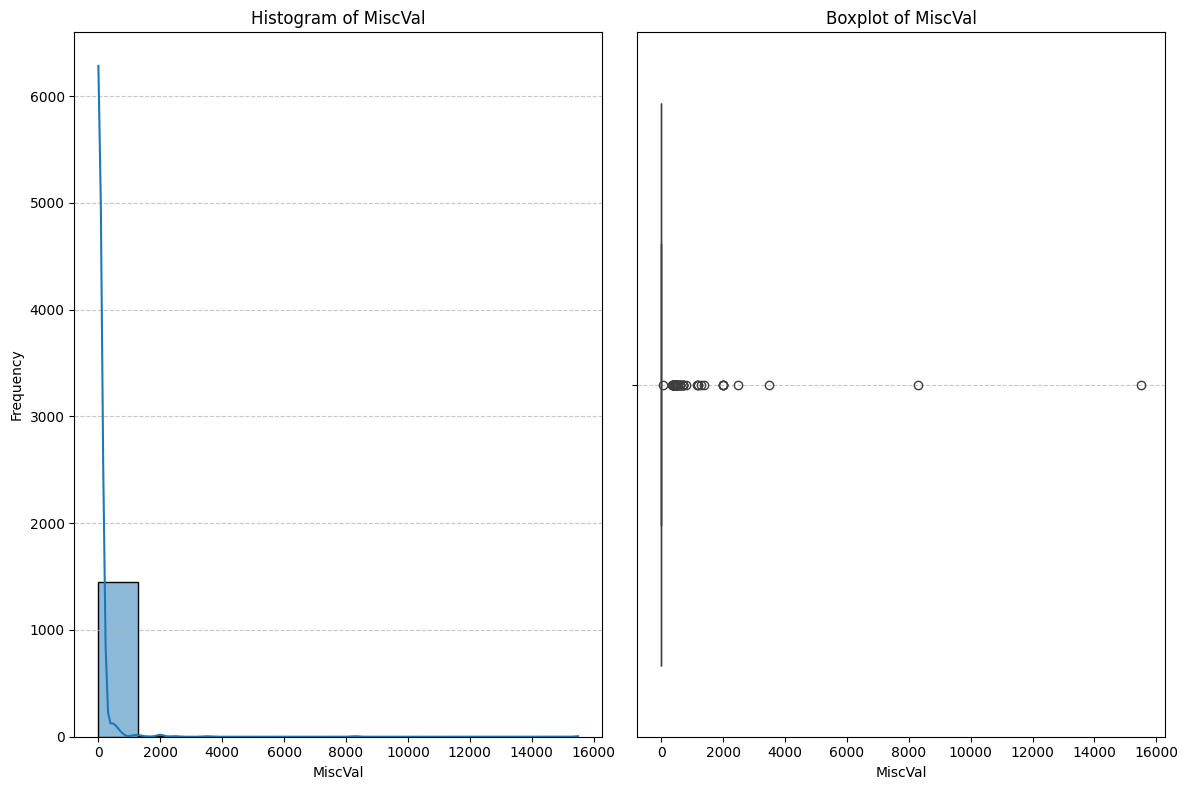

In [42]:
univariate_analyzer.analyze(df, 'MiscVal')

#### Insight:
- The histogram for `MiscVal` (miscellaneous feature value) is highly skewed, with most values concentrated at zero. This indicates that a majority of properties do not have significant miscellaneous feature values.
- The boxplot reveals a few extreme outliers, which likely represent properties with unusually high miscellaneous feature values.
#### Implication:
- Similar to PoolArea, this variable exhibits high sparsity. Converting it to a binary indicator (e.g., HasMiscVal: 1 for non-zero values, 0 otherwise) might be beneficial.
- The outliers may warrant further investigation to understand their impact on the dataset (e.g., correlation with property value).
### MoSold

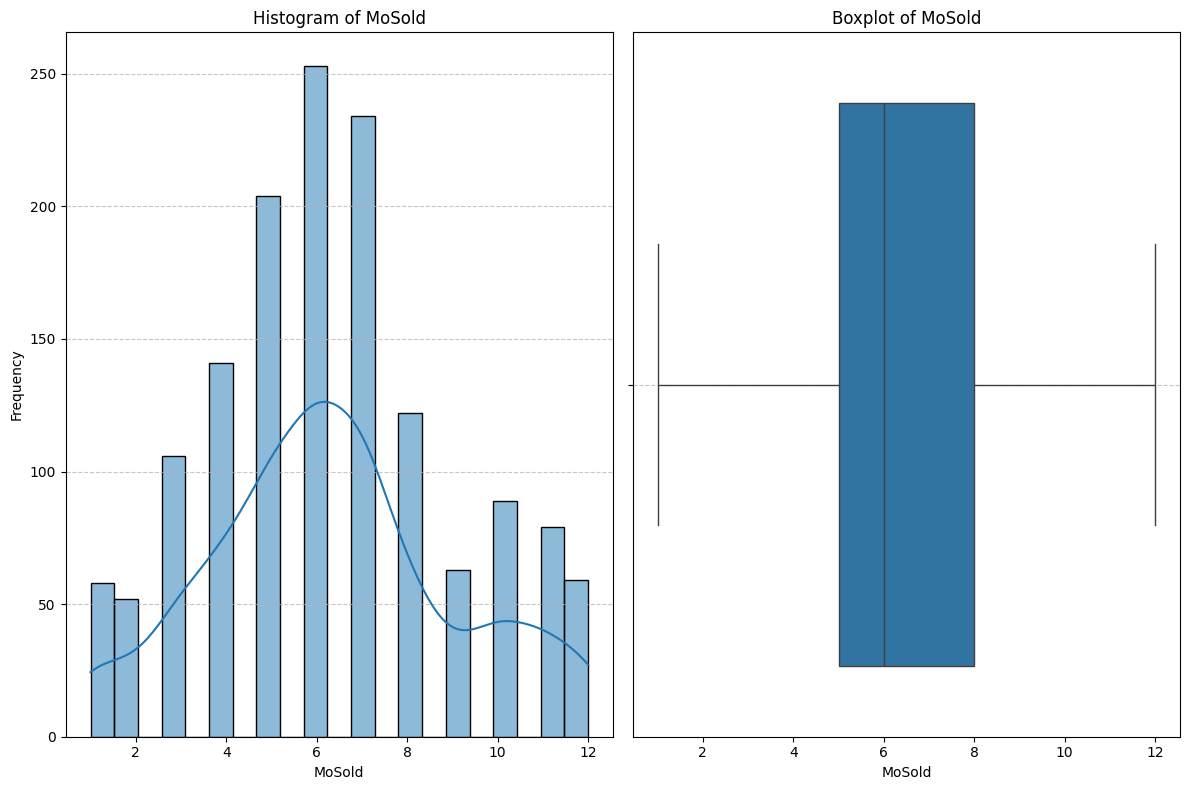

In [43]:
univariate_analyzer.analyze(df, 'MoSold')

#### Insight:
- The histogram for `MoSold` (month of sale) displays a relatively uniform distribution, with a slight peak during the mid-year months (June and July). This suggests a seasonal trend in sales, likely influenced by market demand or weather patterns.
- The boxplot confirms that the values are evenly spread across the months, with no apparent outliers.
#### Implication:
- `MoSold` could potentially be used as a categorical variable to account for seasonality in sales. Encoding the months into seasons (e.g., Winter, Spring, Summer, Fall) might highlight underlying patterns more effectively.
- If combined with other time-related variables (like YrSold), it could provide further insights into trends over time.
### YrSold

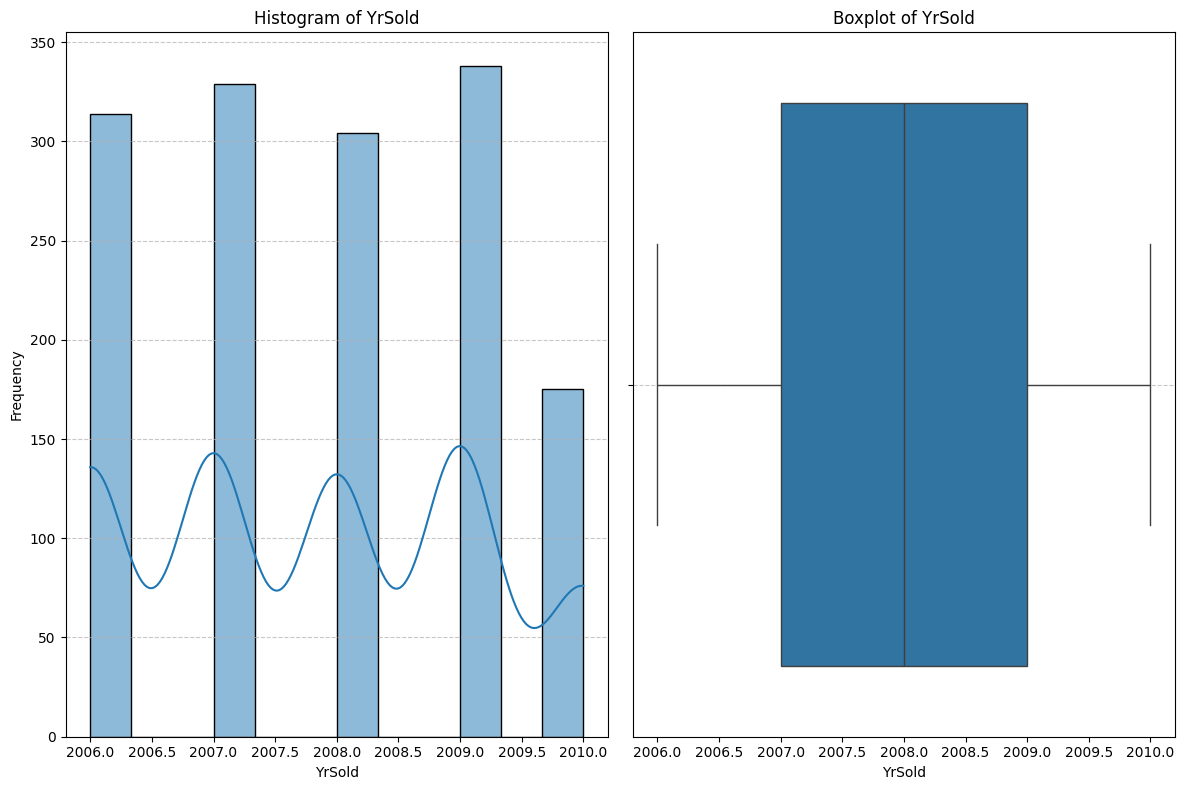

In [44]:
univariate_analyzer.analyze(df, 'YrSold')

#### Insight:
- The histogram for `YrSold` (year of sale) indicates that the number of sales was relatively consistent from 2006 to 2009, with a noticeable drop in 2010. This decline could correspond to external factors like market conditions, economic downturns, or specific regional events.
- The boxplot reflects this consistency, with no extreme outliers across the years.
#### Implication:
- The variable `YrSold` can provide temporal context for sales patterns. However, since it spans only five years, it might be better to use it in conjunction with `MoSold` to capture both yearly and seasonal variations.
- For predictive modeling, you could encode `YrSold` as a categorical variable or as an ordinal one, depending on its importance in understanding trends.
### SalePrice

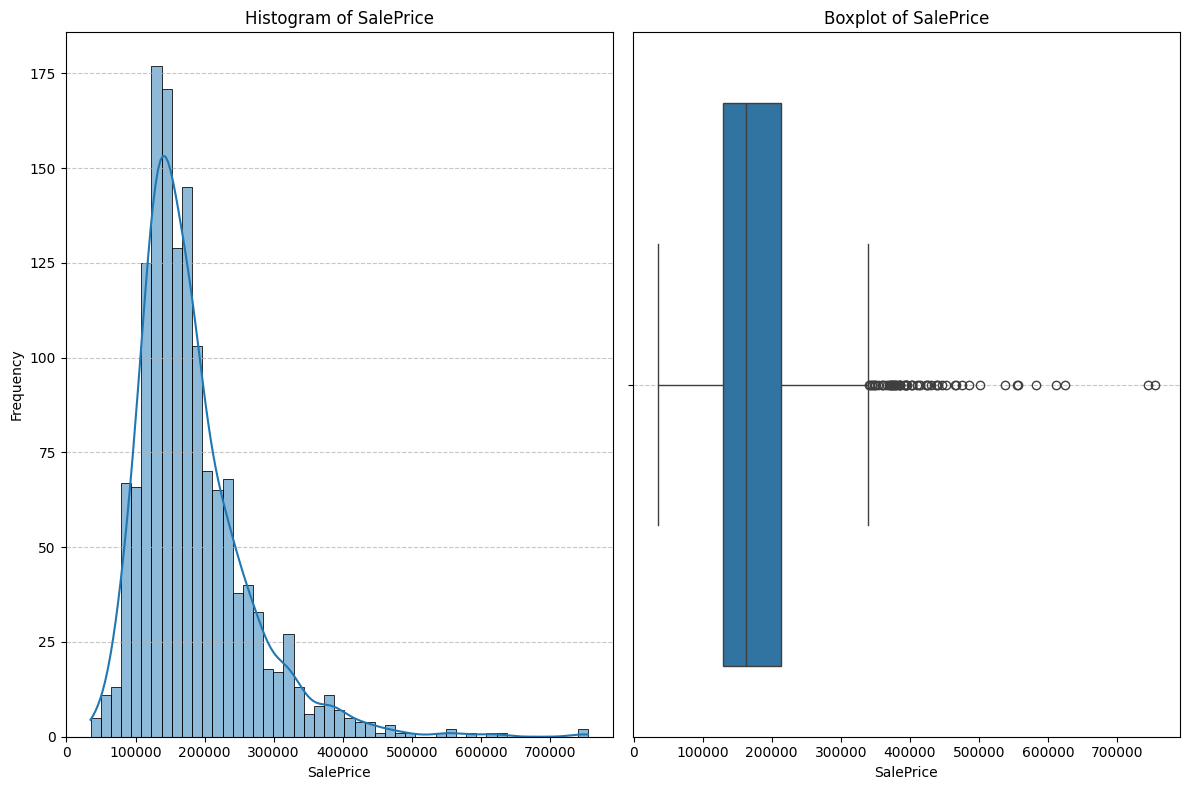

In [8]:
univariate_analyzer.analyze(df, 'SalePrice')

#### Insight:
- The histogram of `SalePrice` exhibits a right-skewed distribution, indicating that most houses are priced in the lower range, with fewer houses at higher price points extending the tail to the right.
- The majority of house prices are concentrated between \$100,000 and \$250,000, with a noticeable peak around $150,000.
- The boxplot confirms the presence of high-value outliers beyond the upper whisker, representing houses that are significantly more expensive than the average.
- The interquartile range (IQR) is relatively narrow, suggesting that most houses fall within a tight price range, while the high-priced houses are exceptions rather than the norm.
#### Implication:
- The right skewness of `SalePrice` suggests that applying a logarithmic transformation may help normalize the distribution, making it more suitable for statistical models that assume normality.
- The presence of high-value outliers could influence model performance, especially in regression analyses where they can disproportionately affect the slope. It may be necessary to investigate these outliers to determine if they are data entry errors or legitimate high-end properties.
- Robust statistical methods or outlier treatment techniques (such as capping or excluding extreme values) might be required to ensure accurate predictive modeling.
- Understanding the distribution of `SalePrice` is crucial for setting realistic expectations in property valuation and for detecting potential anomalies in the data that could skew analysis results.
